# Project: Investigate a Dataset - [TMDB Movies]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
<h3>Brief introduction</h3>
Cet ensemble de données contient des informations sur 10 000 films recueillies auprès de The Movie Database (TMDb), y compris les évaluations des utilisateurs, les recettes. 
<h3>Significance of the columns</h3>
<ul>
    <li>imdb_id : l'identifiant de chaque film</li>
    <li>popularity: popularité du film</li>
    <li>budget: dépenses du film</li>
    <li>revenue: recettes du film</li>
    <li>original_title: Original titre du film</li>
    <li>cast: Équipe de casting </li>
    <li>homepage: le lien pour accéder au film</li>
    <li>director: directeur/directrice du film </li>
    <li>tagline: tagline sur le film </li>
    <li>keywords: mots-clés associés au film </li>
    <li>overview: aperçu </li>
    <li>runtime:  Durée du film</li>
    <li>genres: Type de film </li>
    <li>production_companies: entreprises de production des film  </li>
    <li>release_date: date de sortie </li>
    <li>vote_count: vote_count </li>
    <li>vote_average: moyenne des votes </li>
    <li>release_year: année de sortie </li>
    <li>budget_adj: inflation du budget au fil du temps. </li>
    <li>revenue_adj: inflation du revenue au fil du temps. </li>
</ul>



### Question(s) for Analysis

- Quelle sont les entreprises ont d'excellents revenus ?
- Quels sont les genres les plus frequance d'année en année ?
- Quels sont les genres les plus populaire  ?
- Quelles sont les meilleurs directeur/directrice?
- Quels sont les films les plus populaires par genre?
- Quels sont les date de publication qui ayant une grande sortie de film? Y a-t-il les revenues les plus eleve dans ces années?
- Y a-t-elle une évolution dans le revenue des film ?
- Quelle  année a le revenu le plus élève?
- Est-ce le film a le vote le plus élève, il a le revenue le plus élève
- Quelle sont les film ayant une gande revenue net?
- Quelle sont les film ayant une grande inflation du budget?
- Quelle sont les film ayant une grande inflation du revenue?
- Quelle sont les film ayant une grande inflation du revenue et le petit inflation du budget?
- Quelles sont les entreprises du production qui s'ameliorent par le temps?



In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import re
%matplotlib inline

In [184]:
plt.rcParams.update({'font.size': 30})

<a id='wrangling'></a>
## Data Wrangling

In [185]:
# importation de donnee
df = pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv')

In [186]:
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [187]:
# pour voir le nombre des colonnes et des lignes
df.shape

(10866, 21)

In [188]:
# pour voir les infos sur dataset comme(type de colonne, ..)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [189]:
# pour touver les valeur manquantes
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [190]:
# le nombre de ligne dupliquer
df.duplicated().sum()

1

In [191]:
# pour voir les statistique sur les colonnes de type nemurique
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [192]:
# pour voir les statistique sur les colonnes de type categoriques
df.select_dtypes('object').describe()

,imdb_id,original_title,cast,homepage,director,tagline,keywords,overview,genres,production_companies,release_date
count,10856,10866,10790,2936,10822,8042,9373,10862,10843,9836,10866
unique,10855,10571,10719,2896,5067,7997,8804,10847,2039,7445,5909
top,tt0411951,Hamlet,Louis C.K.,http://www.thehungergames.movie/,Woody Allen,Based on a true story.,woman director,No overview found.,Comedy,Paramount Pictures,1/1/09
freq,2,4,6,4,45,5,134,13,712,156,28


###### On va faire une analyse sur les colonnes de type numérique
- je vais utiliser les boxplot pour trouver (les valeur aberrantes, homogénéité et hétérogénéité)

In [193]:
# fonction qui permet d'afficher les boxplot
def plot_boxplot(dataframe, name_column, vert=False, figsize=(30, 5)):
    plt.title(f'boîte à moustache de la variable "{name_column}"')
    dataframe[name_column].plot(kind='box', figsize=figsize, vert=vert);

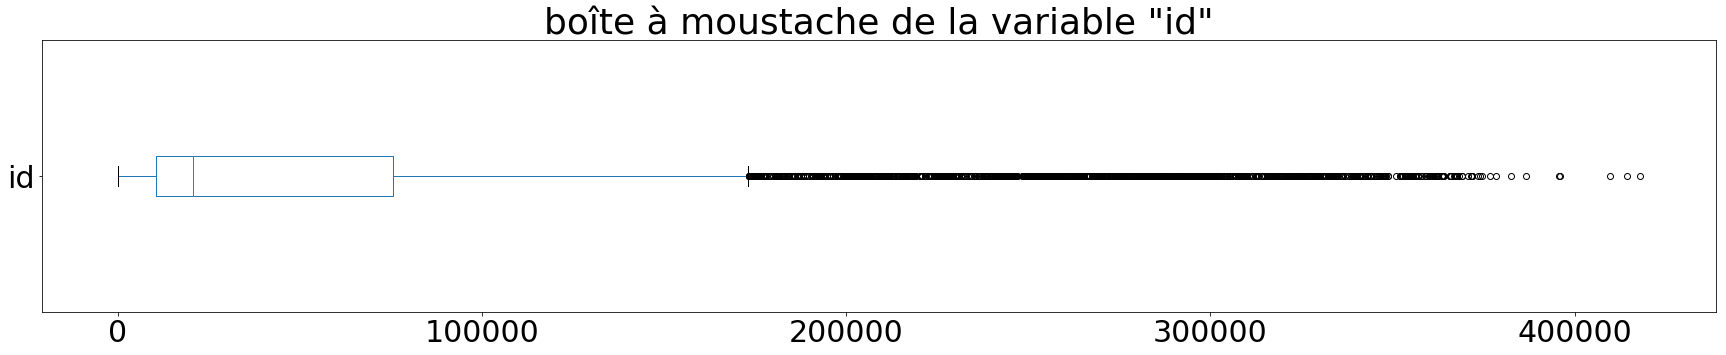

In [194]:
plot_boxplot(df, 'id')

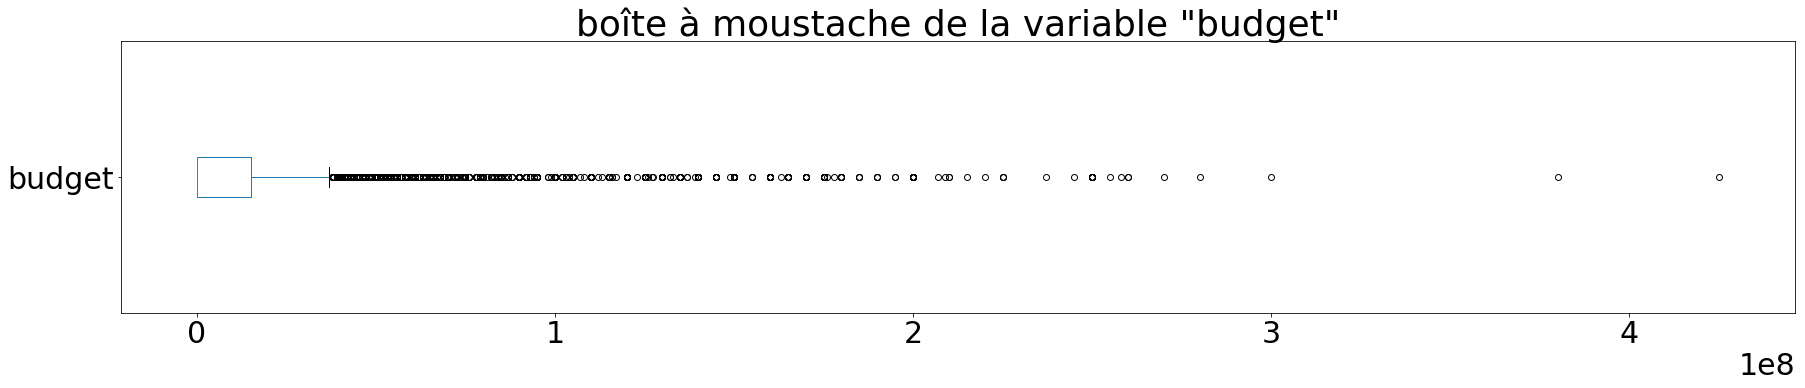

In [195]:
plot_boxplot(df, 'budget')

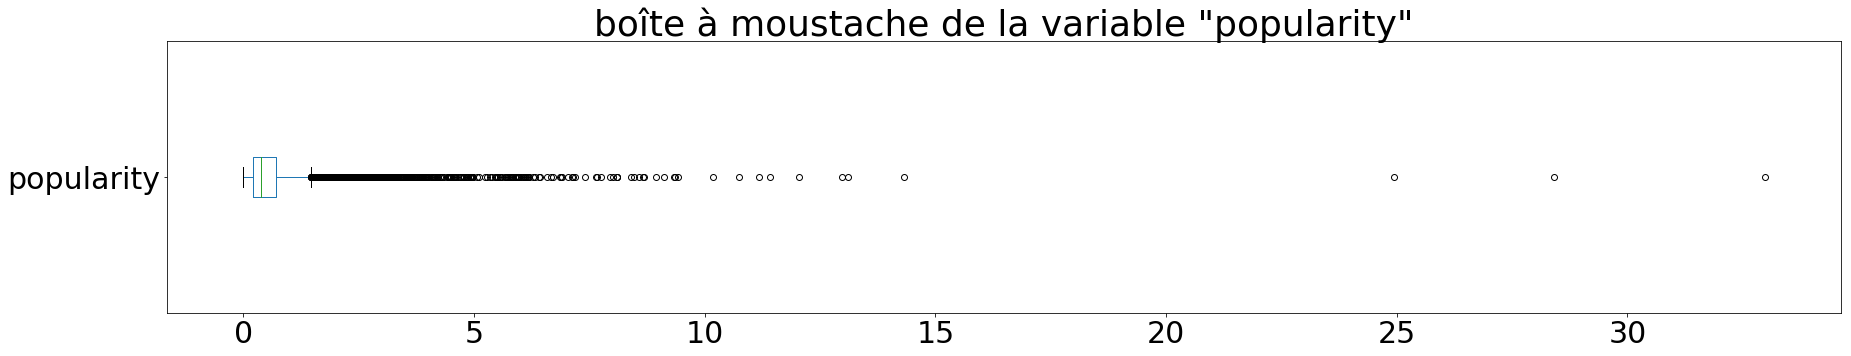

In [196]:
plot_boxplot(df, 'popularity')

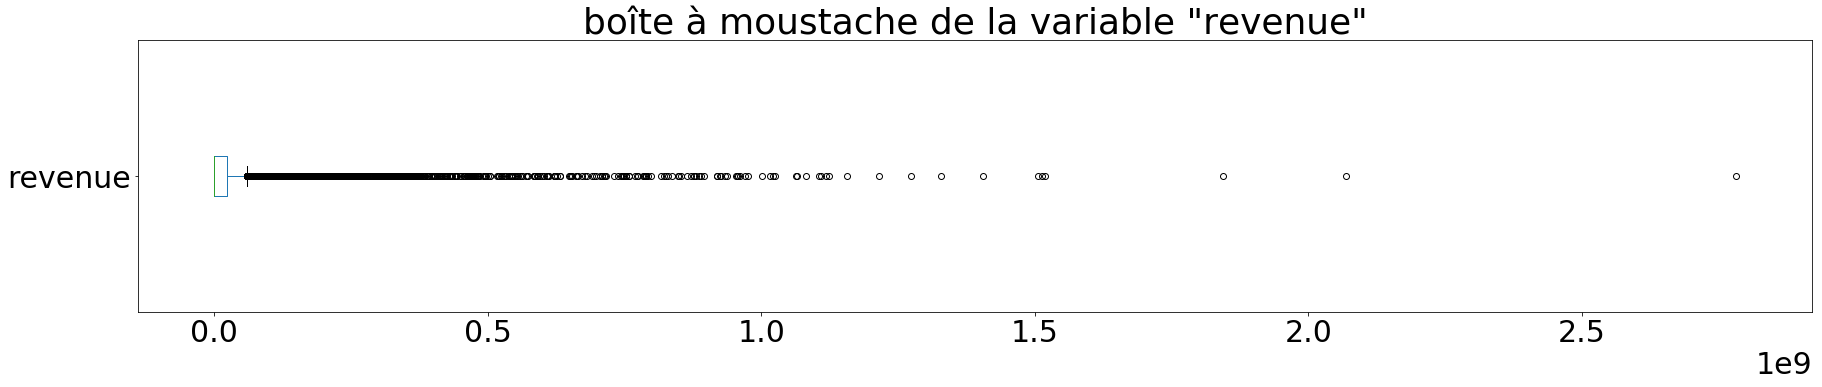

In [197]:
plot_boxplot(df, 'revenue')

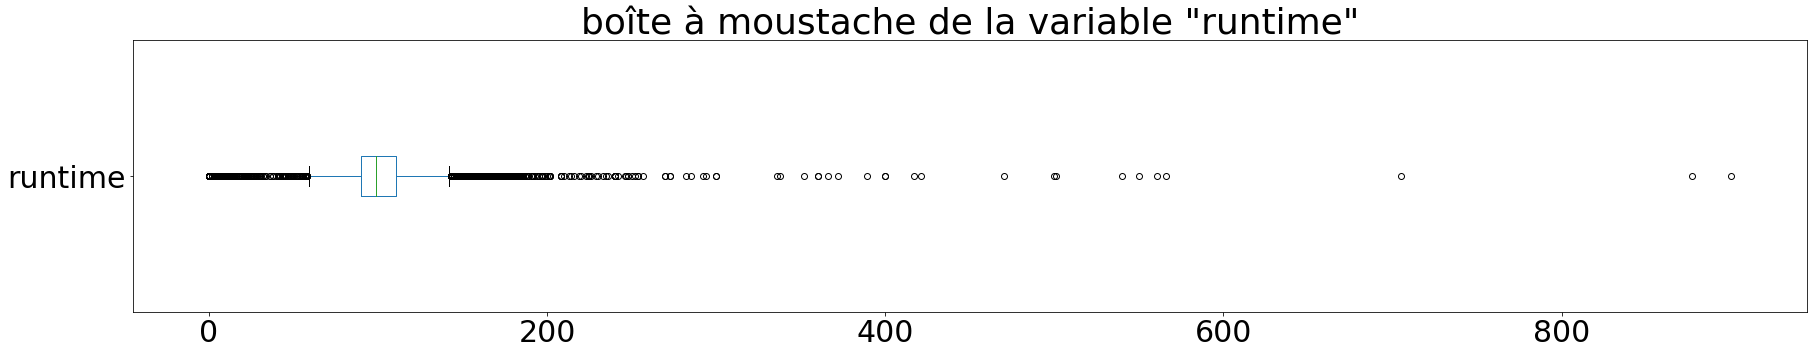

In [198]:
plot_boxplot(df, 'runtime')

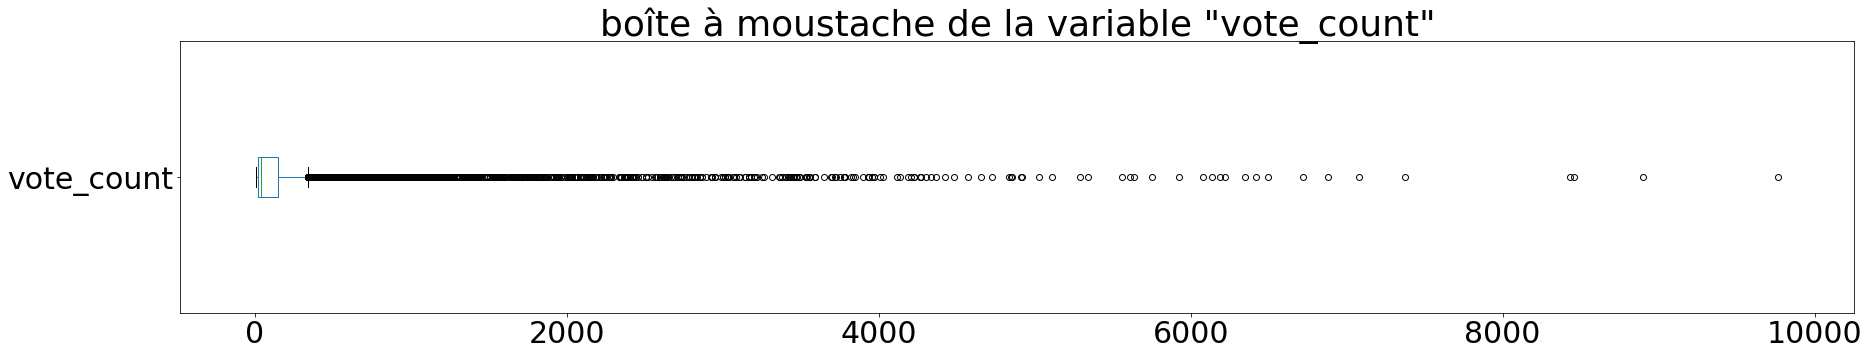

In [199]:
plot_boxplot(df, 'vote_count')

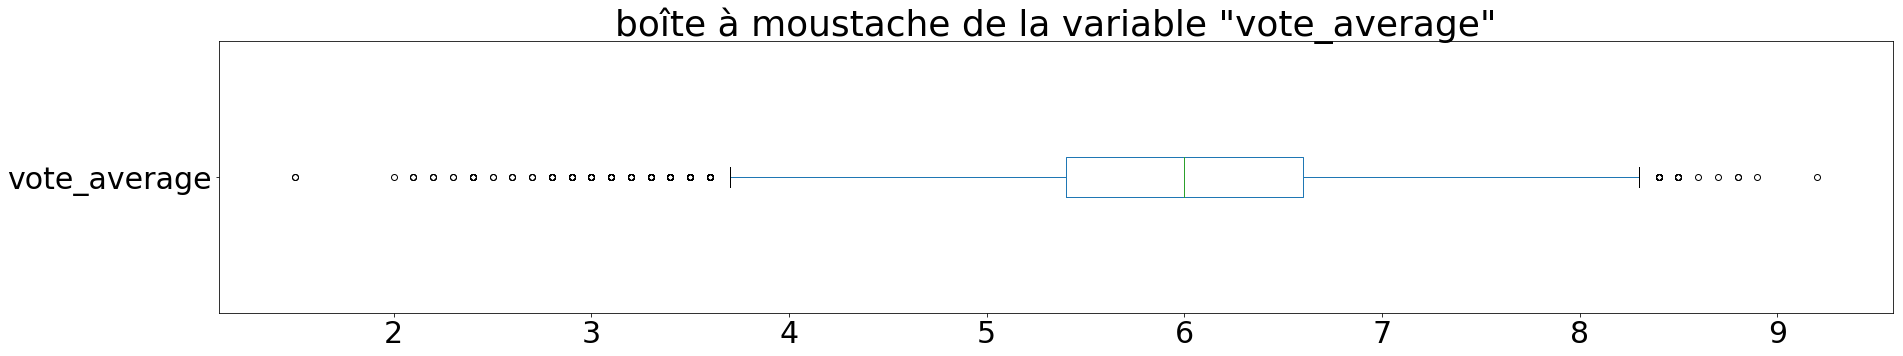

In [200]:
plot_boxplot(df, 'vote_average')

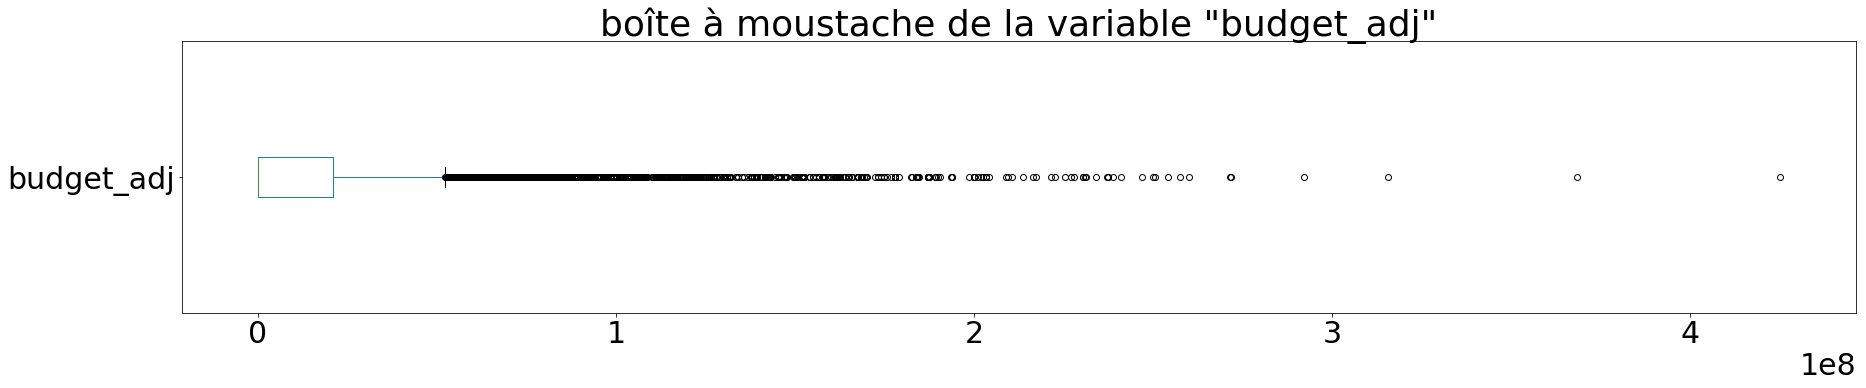

In [201]:
plot_boxplot(df, 'budget_adj')

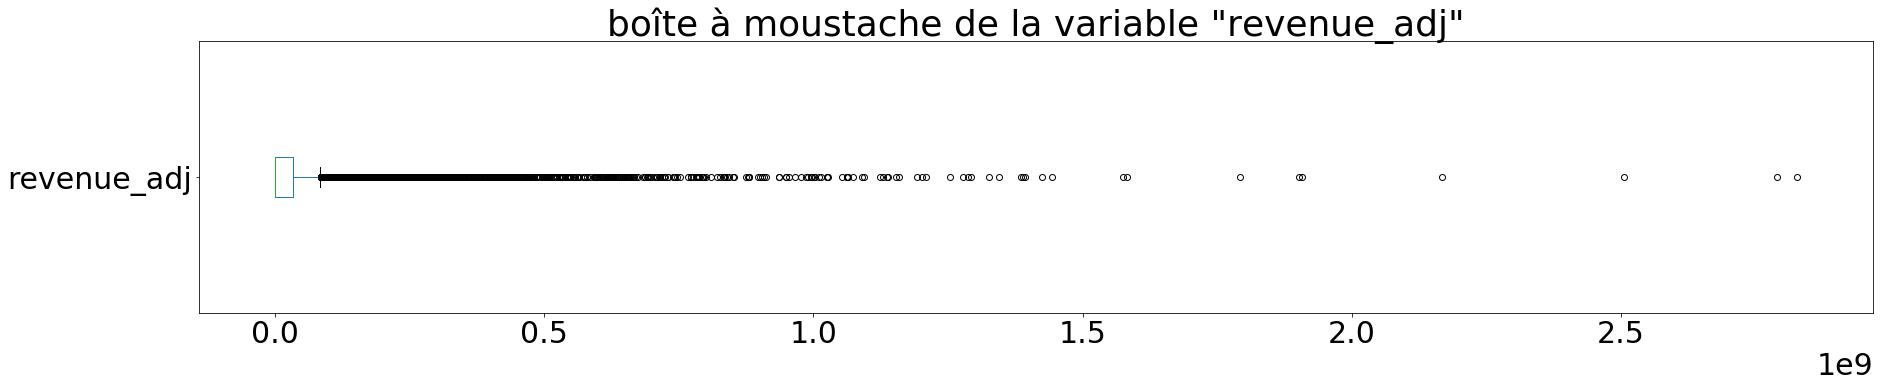

In [202]:
plot_boxplot(df, 'revenue_adj')

In [203]:
###### On va faire une analyse sur les colonnes de type categorique

In [204]:
# pour selectionner les colonnes du type object(categorique)
df.select_dtypes('object').columns

Index(['imdb_id', 'original_title', 'cast', 'homepage', 'director', 'tagline',
       'keywords', 'overview', 'genres', 'production_companies',
       'release_date'],
      dtype='object')

In [205]:
df.imdb_id.unique(), df.imdb_id.nunique()

(array(['tt0369610', 'tt1392190', 'tt2908446', ..., 'tt0060161',
        'tt0061177', 'tt0060666'], dtype=object), 10855)

In [206]:
df.original_title.unique(), df.original_title.nunique()

(array(['Jurassic World', 'Mad Max: Fury Road', 'Insurgent', ...,
        'Beregis Avtomobilya', "What's Up, Tiger Lily?",
        'Manos: The Hands of Fate'], dtype=object), 10571)

In [207]:
df.cast.unique(), df.cast.nunique()

(array([ "Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vincent D'Onofrio|Nick Robinson",
        'Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nicholas Hoult|Josh Helman',
        'Shailene Woodley|Theo James|Kate Winslet|Ansel Elgort|Miles Teller',
        ...,
        'Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Zhzhyonov|Olga Aroseva|Lyubov Dobrzhanskaya',
        'Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|John Sebastian|Tadao Nakamaru',
        'Harold P. Warren|Tom Neyman|John Reynolds|Diane Mahree|Stephanie Nielson'], dtype=object),
 10719)

In [208]:
df.homepage.unique(), df.homepage.nunique()

(array(['http://www.jurassicworld.com/', 'http://www.madmaxmovie.com/',
        'http://www.thedivergentseries.movie/#insurgent', ...,
        'http://www.animalhouse.com/',
        'http://www.mgm.com/#/our-titles/1092/The-Last-Waltz/',
        'http://en.wikipedia.org/wiki/Hooper_(film)'], dtype=object), 2896)

In [209]:
df.director.unique(), df.director.nunique()

(array(['Colin Trevorrow', 'George Miller', 'Robert Schwentke', ...,
        'Alan Rafkin', 'Bruce Brown', 'Harold P. Warren'], dtype=object), 5067)

In [210]:
df.tagline.unique(), df.tagline.nunique()

(array(['The park is open.', 'What a Lovely Day.',
        'One Choice Can Destroy You', ...,
        'Cinerama sweeps YOU into a drama of speed and spectacle!',
        'WOODY ALLEN STRIKES BACK!',
        "It's Shocking! It's Beyond Your Imagination!"], dtype=object), 7997)

In [211]:
df.keywords.unique(), df.keywords.nunique()

(array(['monster|dna|tyrannosaurus rex|velociraptor|island',
        'future|chase|post-apocalyptic|dystopia|australia',
        'based on novel|revolution|dystopia|sequel|dystopic future', ...,
        'car race|racing|formula 1', 'car|trolley|stealing car',
        'fire|gun|drive|sacrifice|flashlight'], dtype=object), 8804)

In [212]:
df.overview.unique(), df.overview.nunique()

(array([ 'Twenty-two years after the events of Jurassic Park, Isla Nublar now features a fully functioning dinosaur theme park, Jurassic World, as originally envisioned by John Hammond.',
        "An apocalyptic story set in the furthest reaches of our planet, in a stark desert landscape where humanity is broken, and most everyone is crazed fighting for the necessities of life. Within this world exist two rebels on the run who just might be able to restore order. There's Max, a man of action and a man of few words, who seeks peace of mind following the loss of his wife and child in the aftermath of the chaos. And Furiosa, a woman of action and a woman who believes her path to survival may be achieved if she can make it across the desert back to her childhood homeland.",
        'Beatrice Prior must confront her inner demons and continue her fight against a powerful alliance which threatens to tear her society apart.',
        ...,
        'An insurance agent who moonlights as a carthie

In [213]:
df.genres.unique(), df.genres.nunique()

(array(['Action|Adventure|Science Fiction|Thriller',
        'Adventure|Science Fiction|Thriller',
        'Action|Adventure|Science Fiction|Fantasy', ...,
        'Adventure|Drama|Action|Family|Foreign',
        'Comedy|Family|Mystery|Romance',
        'Mystery|Science Fiction|Thriller|Drama'], dtype=object), 2039)

In [214]:
df.production_companies.unique(), df.production_companies.nunique()

(array([ 'Universal Studios|Amblin Entertainment|Legendary Pictures|Fuji Television Network|Dentsu',
        'Village Roadshow Pictures|Kennedy Miller Productions',
        'Summit Entertainment|Mandeville Films|Red Wagon Entertainment|NeoReel',
        ...,
        'Cherokee Productions|Joel Productions|Douglas & Lewis Productions',
        'Benedict Pictures Corp.', 'Norm-Iris'], dtype=object), 7445)

In [215]:
#df.release_date.unique(), df.release_date.nunique

In [216]:
# pour voir la correlation entre les freatures
df.corr()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,1.000000,-0.014350,-0.141351,-0.099227,-0.088360,-0.035551,-0.058363,0.511364,-0.189015,-0.138477
popularity,-0.014350,1.000000,0.545472,0.663358,0.139033,0.800828,0.209511,0.089801,0.513550,0.609083
budget,-0.141351,0.545472,1.000000,0.734901,0.191283,0.632702,0.081014,0.115931,0.968963,0.622505
revenue,-0.099227,0.663358,0.734901,1.000000,0.162838,0.791175,0.172564,0.057048,0.706427,0.919110
runtime,-0.088360,0.139033,0.191283,0.162838,1.000000,0.163278,0.156835,-0.117204,0.221114,0.175676
vote_count,-0.035551,0.800828,0.632702,0.791175,0.163278,1.000000,0.253823,0.107948,0.587051,0.707942
vote_average,-0.058363,0.209511,0.081014,0.172564,0.156835,0.253823,1.000000,-0.117632,0.093039,0.193085
release_year,0.511364,0.089801,0.115931,0.057048,-0.117204,0.107948,-0.117632,1.000000,0.016793,-0.066256
budget_adj,-0.189015,0.513550,0.968963,0.706427,0.221114,0.587051,0.093039,0.016793,1.000000,0.646607
revenue_adj,-0.138477,0.609083,0.622505,0.919110,0.175676,0.707942,0.193085,-0.066256,0.646607,1.000000


- il y a une fore correlation positive entre revenue et revenue_adj
- il y a une fore correlation positive entre budget et budget_adj
- il y a une fore correlation positive entre vote_count et popularity

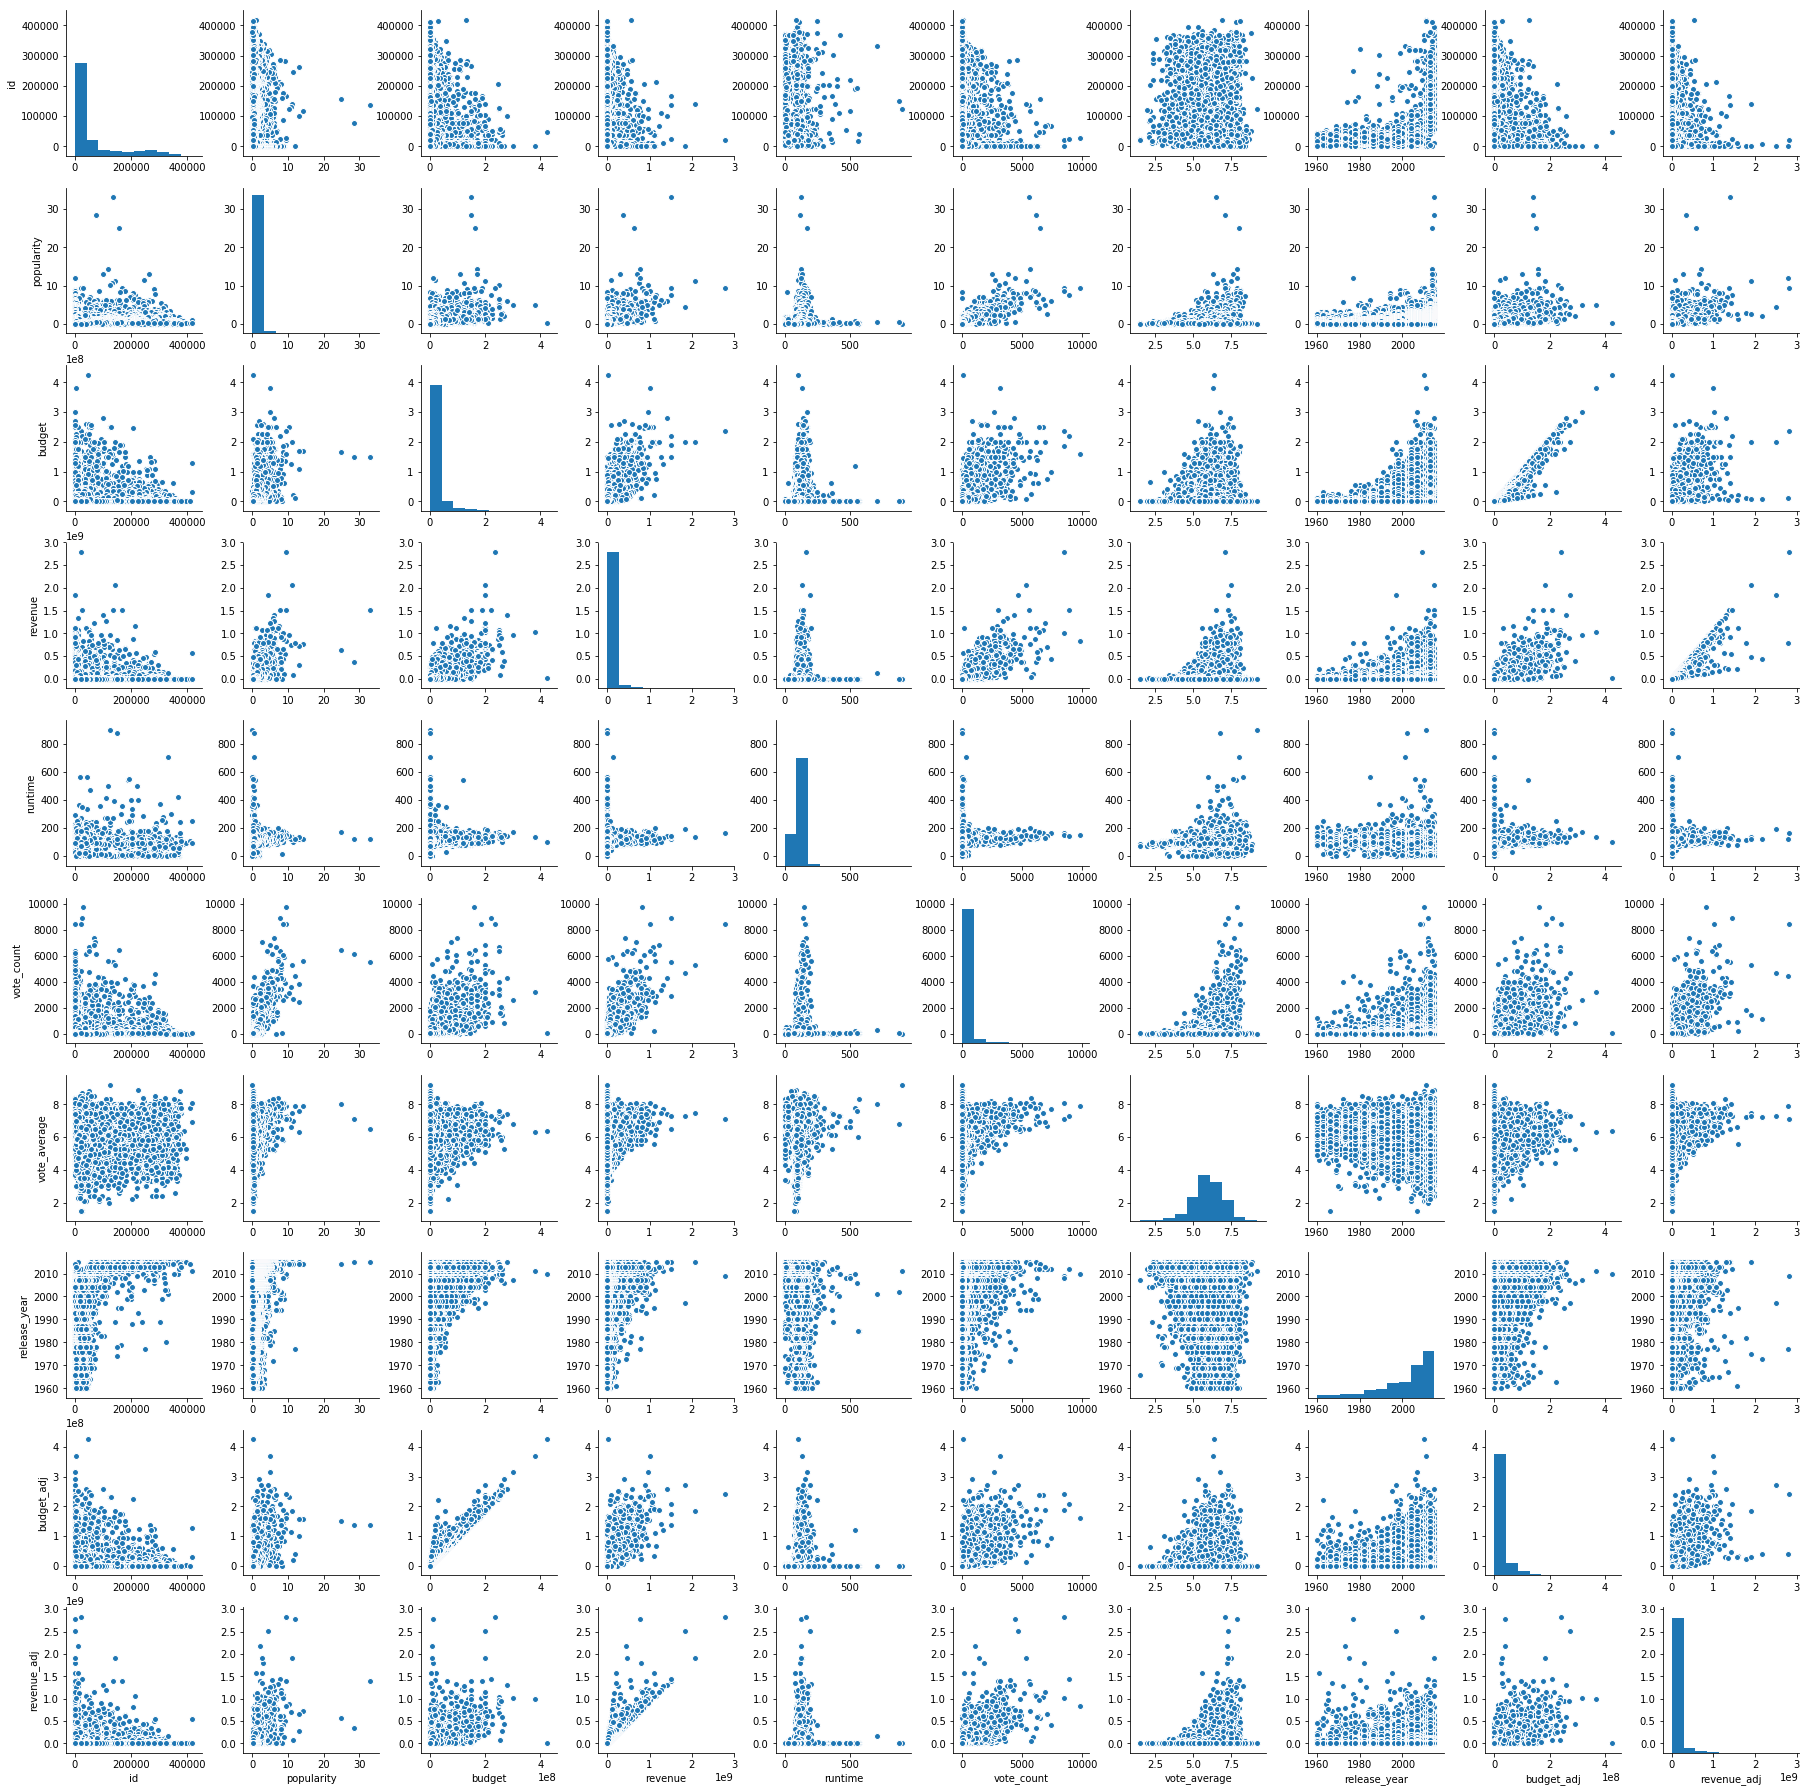

In [217]:
#pd.plotting.scatter_matrix(df)
plt.rcParams.update({'font.size': 10})
sns.pairplot(df.select_dtypes(include=['int', 'float']));

<p>
    Apres cette petite exploitation, on a trouvé des points à corriger
</p>
<h5>Le résultat d'exploration </h5>

- toutes les colonnes contiennt des valeurs aberentes
- toutes les colonnes sont hétérogène sauf les colonnes count_average et runtime

- on a aussi besoin de supprimer des colonnes comme imdb_id et homepage parce qu'elles ne contiennent pas des infos pertinentes 
- on a des lignes dupliquees
- on a trouve les valeurs manquantes
- manipulation des colonnes de type object car elles contiennent plusieurs mots
- on a la correlation entre quelque colonnes



### Data Cleaning

 

<h4>valeurs manquantes<h4>

In [218]:
# la supprission des colonnes
df.drop(columns=['imdb_id', 'homepage'], axis=1, inplace=True)

In [219]:
df.drop(columns=['overview'], axis=1, inplace=True)

In [220]:
# le pourcetage de valeurs manquantes dans chaque colonne
(df.isnull().sum() * 100) / df.shape[0]

id                       0.000000
popularity               0.000000
budget                   0.000000
revenue                  0.000000
original_title           0.000000
cast                     0.699429
director                 0.404933
tagline                 25.989324
keywords                13.740107
runtime                  0.000000
genres                   0.211669
production_companies     9.479109
release_date             0.000000
vote_count               0.000000
vote_average             0.000000
release_year             0.000000
budget_adj               0.000000
revenue_adj              0.000000
dtype: float64

- pour la colonne *tagline* contient 25% de valeur manquantes, le nombre des valeur de la colonne est 8042 et le nombre de valeurs unique est 7997 donc 8042 - 7997 = 45 d'apres cette analyse on va supprimer la colonne tagline
- meme principe pour la colonne keywords 

In [221]:
df.drop(columns=['tagline', 'keywords'], axis=1, inplace=True)

- les valeur manquantes existent dans les colonnes de type categorique la remplisage par la valeur la plus frequante ou une valuer eleatoire ou autre. Ces méthodes de remplissage pour notre cas ne sont pas correctes
- on peut faire une étape de collecte de données juste pour trouver ces valeurs manquantes toutes les valeurs manquantes seront supprimées

In [222]:
df.dropna(inplace=True)

###### convression de type

In [223]:
df.release_date = pd.to_datetime(df.release_date)

<h4>valeurs aberrentes <h4>

In [224]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,9773.000000,9773.000000,9.773000e+03,9.773000e+03,9773.000000,9773.000000,9773.000000,9773.000000,9.773000e+03,9.773000e+03
mean,63187.492479,0.694711,1.618108e+07,4.422678e+07,102.925509,239.298782,5.963430,2000.879362,1.941707e+07,5.704735e+07
std,90713.666750,1.036879,3.220939e+07,1.225834e+08,27.876224,602.982068,0.913179,13.036453,3.566467e+07,1.514432e+08
min,5.000000,0.000188,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10222.000000,0.232756,0.000000e+00,0.000000e+00,90.000000,18.000000,5.400000,1994.000000,0.000000e+00,0.000000e+00
50%,18681.000000,0.419765,2.000000e+05,0.000000e+00,100.000000,46.000000,6.000000,2005.000000,3.114254e+05,0.000000e+00
75%,70577.000000,0.776380,1.940000e+07,3.104204e+07,112.000000,173.000000,6.600000,2011.000000,2.469335e+07,4.311344e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,877.000000,9767.000000,8.700000,2015.000000,4.250000e+08,2.827124e+09


In [225]:
df.query('revenue <= 0').revenue.value_counts()

0    5022
Name: revenue, dtype: int64

In [226]:
df.query('budget <= 0').budget.value_counts()

0    4751
Name: budget, dtype: int64

In [227]:
df.query('runtime <= 0').runtime.value_counts()

0    13
Name: runtime, dtype: int64

In [228]:
df.query('revenue <= 0 & budget <= 0').revenue.value_counts()

0    3806
Name: revenue, dtype: int64

- on éliminera toutes les valeurs égales à 0 dans les trois colonnes  (revenue, budget, runtime)

In [229]:
new_df = df.query('runtime > 0 & budget > 0 & revenue > 0')
new_df.head(2)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08


In [230]:
new_df.shape

(3806, 16)

In [231]:
new_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3806.000000,3806.000000,3.806000e+03,3.806000e+03,3806.000000,3806.000000,3806.000000,3806.000000,3.806000e+03,3.806000e+03
mean,40040.938518,1.203625,3.760600e+07,1.089450e+08,109.346558,534.047556,6.170257,2001.231477,4.471590e+07,1.386797e+08
std,67576.835878,1.480407,4.231641e+07,1.772829e+08,19.845063,883.668197,0.792560,11.329019,4.488171e+07,2.169803e+08
min,5.000000,0.010335,1.000000e+00,2.000000e+00,15.000000,10.000000,2.200000,1960.000000,9.693980e-01,2.370705e+00
25%,5932.500000,0.470673,1.000000e+07,1.429262e+07,96.000000,74.000000,5.700000,1995.000000,1.354637e+07,1.923514e+07
50%,11255.000000,0.810226,2.500000e+07,4.620904e+07,106.000000,208.500000,6.200000,2004.000000,3.038360e+07,6.283467e+07
75%,38703.500000,1.387058,5.000000e+07,1.260625e+08,119.000000,584.000000,6.700000,2010.000000,6.083489e+07,1.657273e+08
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


- on a  supprimé les valeurs sont égales à 0
- on va garder les valeurs aberrantes parce que les feartures sont hétérogènes
- on ne peut pas supprimer toutes les valeurs aberrantes car le nombre de valeurs est très grand
- on ne peut pas les remplacer par d'autres valeurs
- dans la vie real on peut refaire la collecte des données pour équilibrer le jeu de données

<h4>Les features categoriques</h4>

In [232]:
# fonction pour remplacer les multiples espace par un espace, ..
def CleanString(string_word: str) -> str:
    return re.sub(' {2,}', ' ', str(string_word).lower().strip())

In [233]:
new_df.select_dtypes('object').columns

Index(['original_title', 'cast', 'director', 'genres', 'production_companies'], dtype='object')

In [234]:
for column in new_df.select_dtypes('object').columns:
    new_df[column] = new_df[column].apply(CleanString)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [235]:
# def SplitString(string_word: str) -> str:
#     return str(string_word).split('|')[0]

- dans les colonnes du type object, on trouve plusieurs valeurs séparées par |, dans ce cas on va garder juste les
  valeurs les plus fréquentes dans ce jeu de données

In [236]:
def get_frequency_elements(df, name_column):
    return df[name_column].str.get_dummies(sep=('|')).sum().reset_index().rename(columns={0: f'sum_{name_column}', 'index':name_column})

In [237]:
df_genres = get_frequency_elements(new_df, 'genres').sort_values('sum_genres', ascending=False)
df_genres

,genres,sum_genres
6,drama,1730
3,comedy,1335
16,thriller,1195
0,action,1077
1,adventure,743
14,romance,658
4,crime,650
15,science fiction,518
11,horror,459
7,family,417


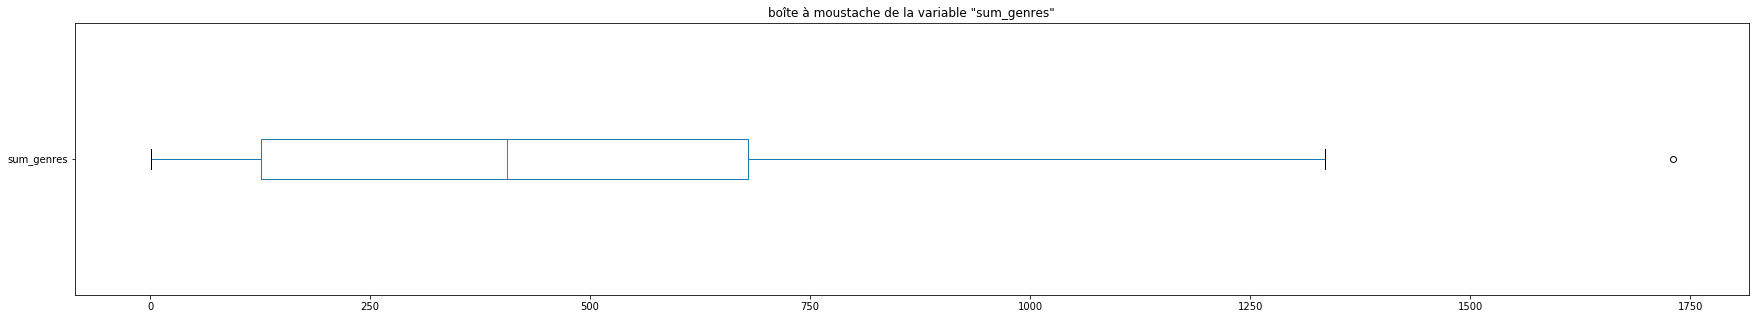

In [238]:
plot_boxplot(df_genres, 'sum_genres')

- on peut dire que le feature <strong>genres</strong> un peu homogene.
- la colonne <strong>genres</strong> a un point aberrante

In [239]:
# on va remplace les genres dans le jeu de donnee par les plus frequance exemple:  "Action|Adventure|Science Fiction|Thriller" devient "Action"
def get_new_feature(x, list_new_elements):
    list_genre = x.split('|')
    for new_el in list_new_elements:
        for old_el in list_genre:
            if new_el == old_el:
                return new_el
    return list_genre[0]

In [240]:
list_new_elements = df_genres.genres.tolist()
list_new_elements

['drama',
 'comedy',
 'thriller',
 'action',
 'adventure',
 'romance',
 'crime',
 'science fiction',
 'horror',
 'family',
 'fantasy',
 'mystery',
 'animation',
 'music',
 'history',
 'war',
 'western',
 'documentary',
 'foreign',
 'tv movie']

- la liste des genres tier par ordre decroissant

In [241]:
new_df['genres_modified'] = new_df.genres.apply(get_new_feature, list_new_elements = list_new_elements)
new_df.head(2)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genres_modified
0,135397,32.985763,150000000,1513528810,jurassic world,chris pratt|bryce dallas howard|irrfan khan|vi...,colin trevorrow,124,action|adventure|science fiction|thriller,universal studios|amblin entertainment|legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,thriller
1,76341,28.419936,150000000,378436354,mad max: fury road,tom hardy|charlize theron|hugh keays-byrne|nic...,george miller,120,action|adventure|science fiction|thriller,village roadshow pictures|kennedy miller produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,thriller


- On a garde dans la colonne <strong> genres_modified </strong> juste les genres les plus frequnates 

#### la colonne cast

In [242]:
df_cast = get_frequency_elements(new_df, 'cast').sort_values('sum_cast', ascending=False)
df_cast

,cast,sum_cast
5435,robert de niro,52
870,bruce willis,46
5703,samuel l. jackson,44
4802,nicolas cage,43
4325,matt damon,36
3241,johnny depp,35
4667,morgan freeman,34
6147,sylvester stallone,34
6361,tom hanks,34
769,brad pitt,34


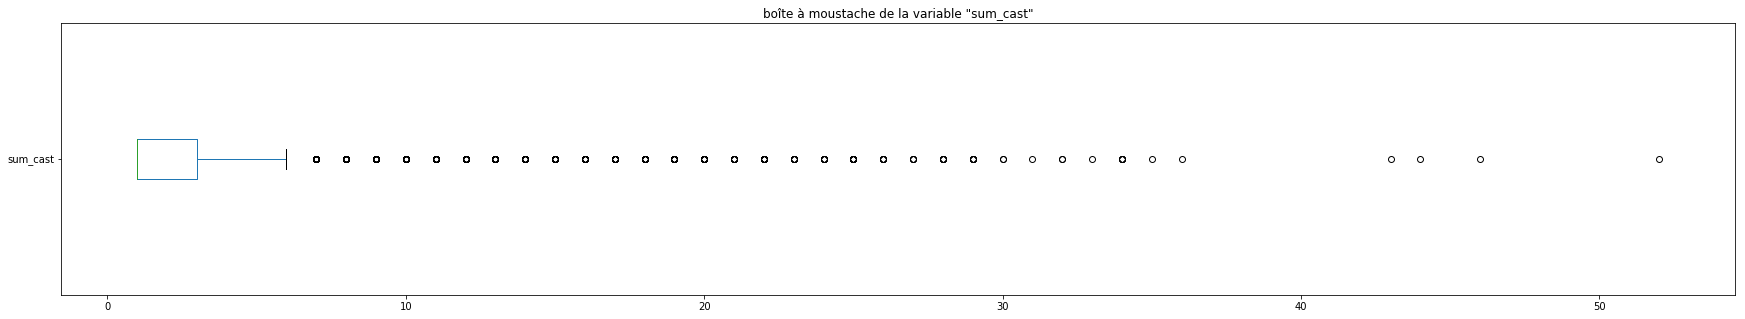

In [243]:
plot_boxplot(df_cast, 'sum_cast')

- la colonne <string> sum_cast </string> est heterogenne
- elle a des points aberrantes

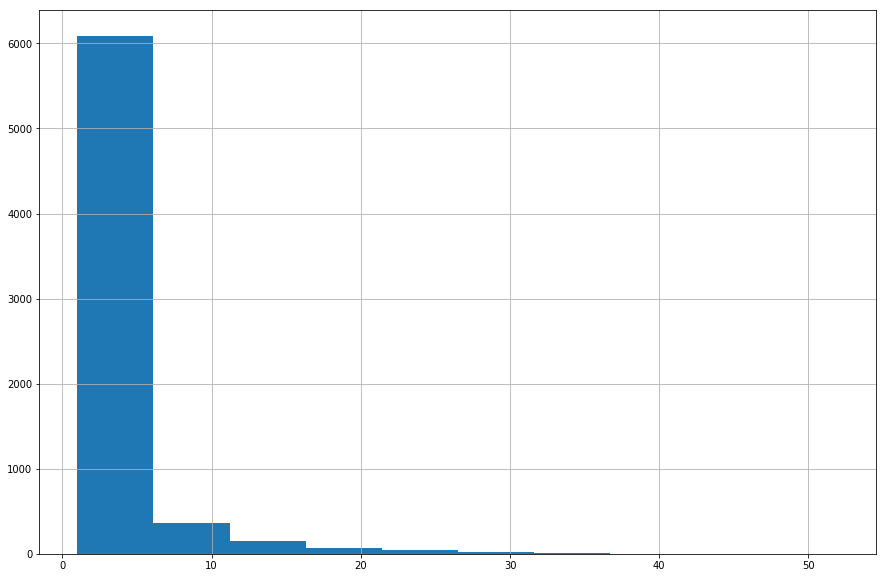

In [244]:
df_cast.sum_cast.hist(figsize=(15, 10));

- on trouve que la majortie des actors jouent un seul fois dans un film

In [245]:
df_cast.sum_cast.describe()

count    6748.000000
mean        2.813130
std         4.137752
min         1.000000
25%         1.000000
50%         1.000000
75%         3.000000
max        52.000000
Name: sum_cast, dtype: float64

In [246]:
new_df['cast_modified'] = new_df.cast.apply(get_new_feature, list_new_elements = df_cast.cast.tolist())
new_df.head(2)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genres_modified,cast_modified
0,135397,32.985763,150000000,1513528810,jurassic world,chris pratt|bryce dallas howard|irrfan khan|vi...,colin trevorrow,124,action|adventure|science fiction|thriller,universal studios|amblin entertainment|legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,thriller,vincent d'onofrio
1,76341,28.419936,150000000,378436354,mad max: fury road,tom hardy|charlize theron|hugh keays-byrne|nic...,george miller,120,action|adventure|science fiction|thriller,village roadshow pictures|kennedy miller produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,thriller,charlize theron


#### la colonne production_companies

In [247]:
df_compa = get_frequency_elements(new_df, 'production_companies').sort_values('sum_production_companies', ascending=False)
df_compa

,production_companies,sum_production_companies
3041,universal pictures,329
3134,warner bros.,324
2183,paramount pictures,270
2998,twentieth century fox film corporation,201
643,columbia pictures,178
2024,new line cinema,152
3126,walt disney pictures,117
2948,touchstone pictures,116
1863,metro-goldwyn-mayer (mgm),109
2403,relativity media,102


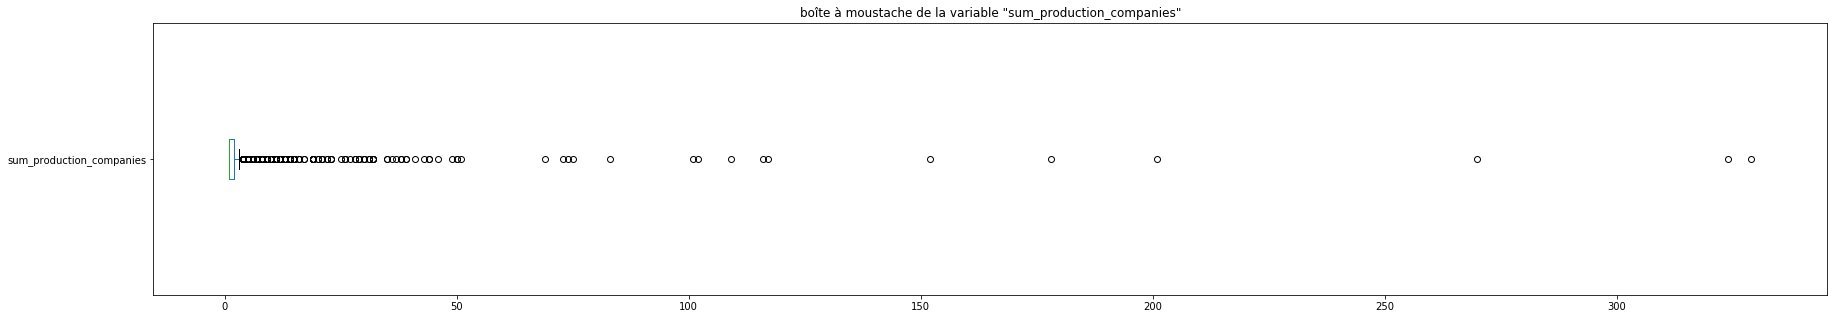

In [248]:
plot_boxplot(df_compa, 'sum_production_companies')

In [249]:
new_df['pro_companie_modified'] = new_df.production_companies.apply(get_new_feature, list_new_elements = df_compa.production_companies.tolist())
new_df.head(2)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genres_modified,cast_modified,pro_companie_modified
0,135397,32.985763,150000000,1513528810,jurassic world,chris pratt|bryce dallas howard|irrfan khan|vi...,colin trevorrow,124,action|adventure|science fiction|thriller,universal studios|amblin entertainment|legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,thriller,vincent d'onofrio,amblin entertainment
1,76341,28.419936,150000000,378436354,mad max: fury road,tom hardy|charlize theron|hugh keays-byrne|nic...,george miller,120,action|adventure|science fiction|thriller,village roadshow pictures|kennedy miller produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,thriller,charlize theron,village roadshow pictures


In [250]:
new_df.to_csv('new_data_set.csv', index=False)

In [251]:
new_df.columns

Index(['id', 'popularity', 'budget', 'revenue', 'original_title', 'cast',
       'director', 'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj', 'genres_modified', 'cast_modified',
       'pro_companie_modified'],
      dtype='object')

<a id='eda'></a>
## Exploratory Data Analysis





In [252]:
plt.rcParams.update({'font.size': 25})

### Research Question 1  (Quelle sont les entreprises ont d'excellents revenus ?)

In [253]:
df_best_revenue_campa = new_df.groupby('pro_companie_modified')['revenue'].agg(['sum','count']).sort_values('sum', ascending=False).head(10)
df_best_revenue_campa

,sum,count
pro_companie_modified,,
warner bros.,51955639288,323
universal pictures,46230672846,329
paramount pictures,38205100521,261
twentieth century fox film corporation,34556532145,196
walt disney pictures,32027313979,117
columbia pictures,27020395975,169
new line cinema,18543805406,143
touchstone pictures,11203086257,106
columbia pictures corporation,9902071653,88


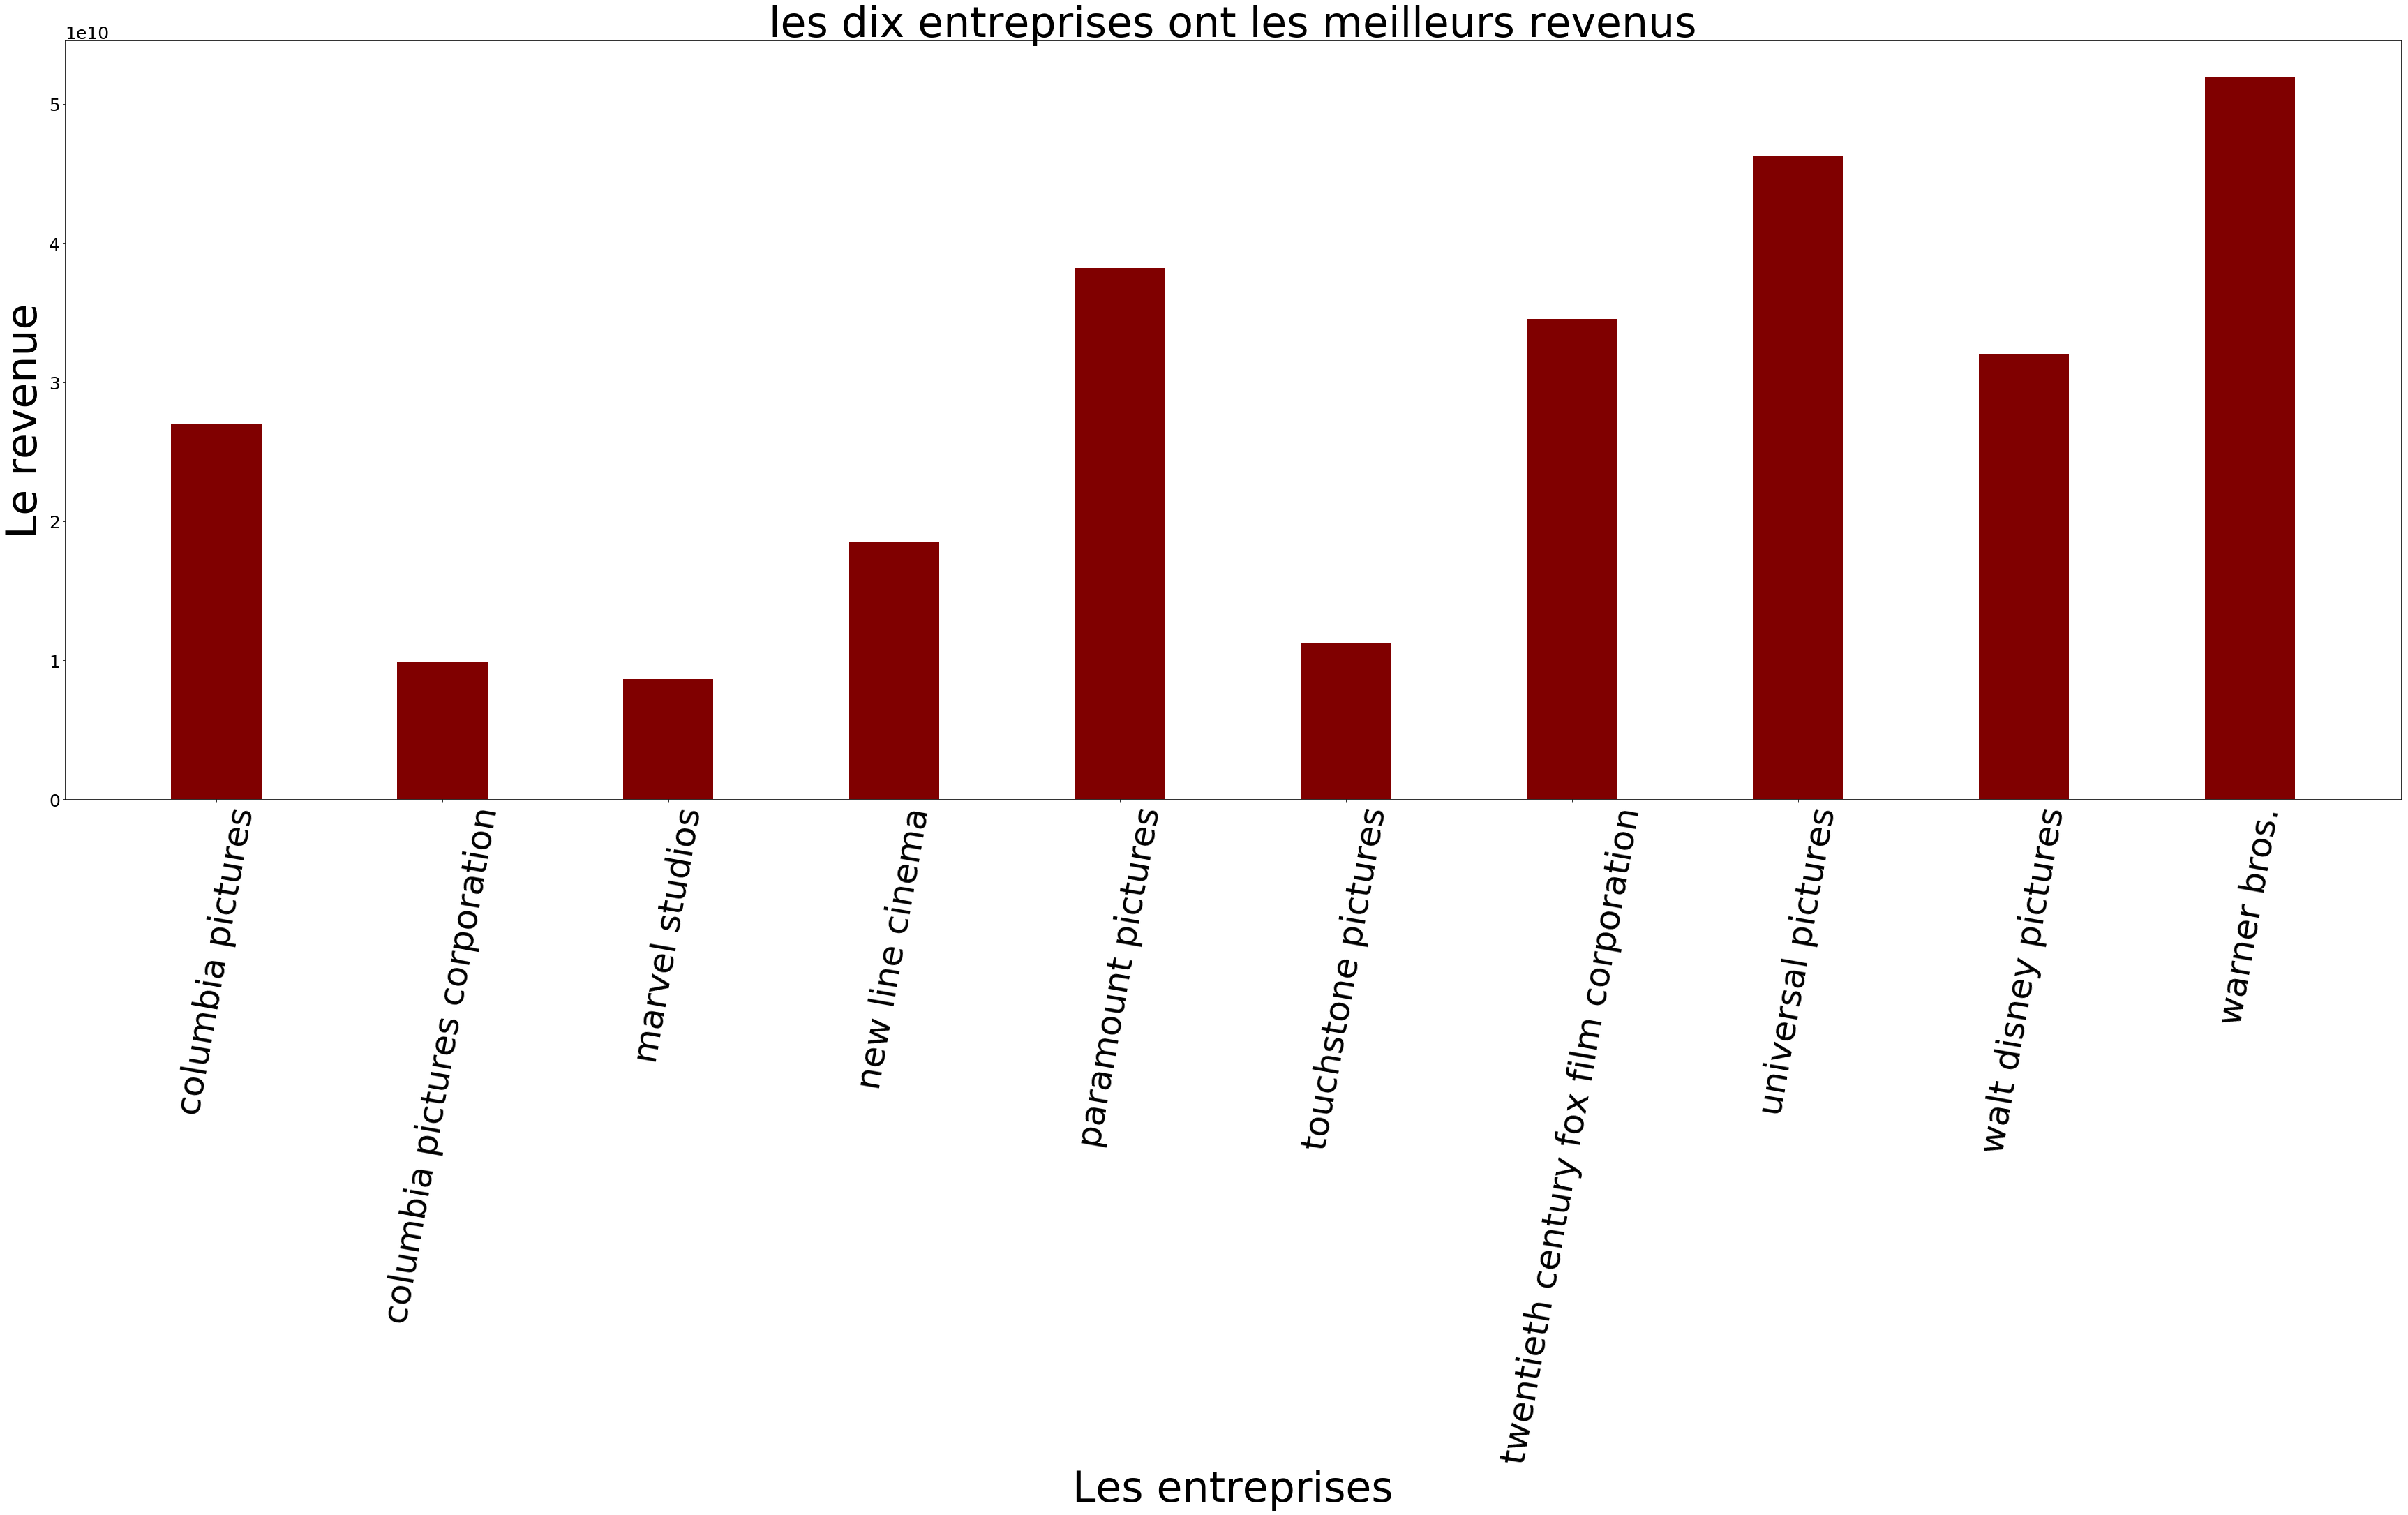

In [254]:
companies = list(df_best_revenue_campa.index)
values = list(df_best_revenue_campa['sum'].values)

fig = plt.figure(figsize = (60, 20))
plt.bar(companies, values, color ='maroon', width = 0.4)

plt.xlabel("Les entreprises", fontsize=60)
plt.ylabel("Le revenue", fontsize=60)
plt.xticks(rotation=80, fontsize=50)
plt.title("les dix entreprises ont les meilleurs revenus", fontsize=60)
plt.show()

- on peut voir qu'il n'y a pas une grande dispersion entre les revenues des dix entreprises

In [255]:
df_best_revenue_campa.describe()

,sum,count
count,1.000000e+01,10.0000
mean,2.782949e+10,174.3000
std,1.543356e+10,103.8707
min,8.650272e+09,11.0000
25%,1.303827e+10,108.7500
50%,2.952385e+10,156.0000
75%,3.729296e+10,244.7500
max,5.195564e+10,329.0000


### Research Question 2 (Quels sont les genres les plus frequance d'année en année ? )

In [256]:
df_genres = new_df.groupby(['genres_modified', 'release_year'])['genres'].agg(['count']).reset_index()
df_genres.head()

,genres_modified,release_year,count
0,action,1960,1
1,action,1961,1
2,action,1966,1
3,action,1967,1
4,action,1971,1


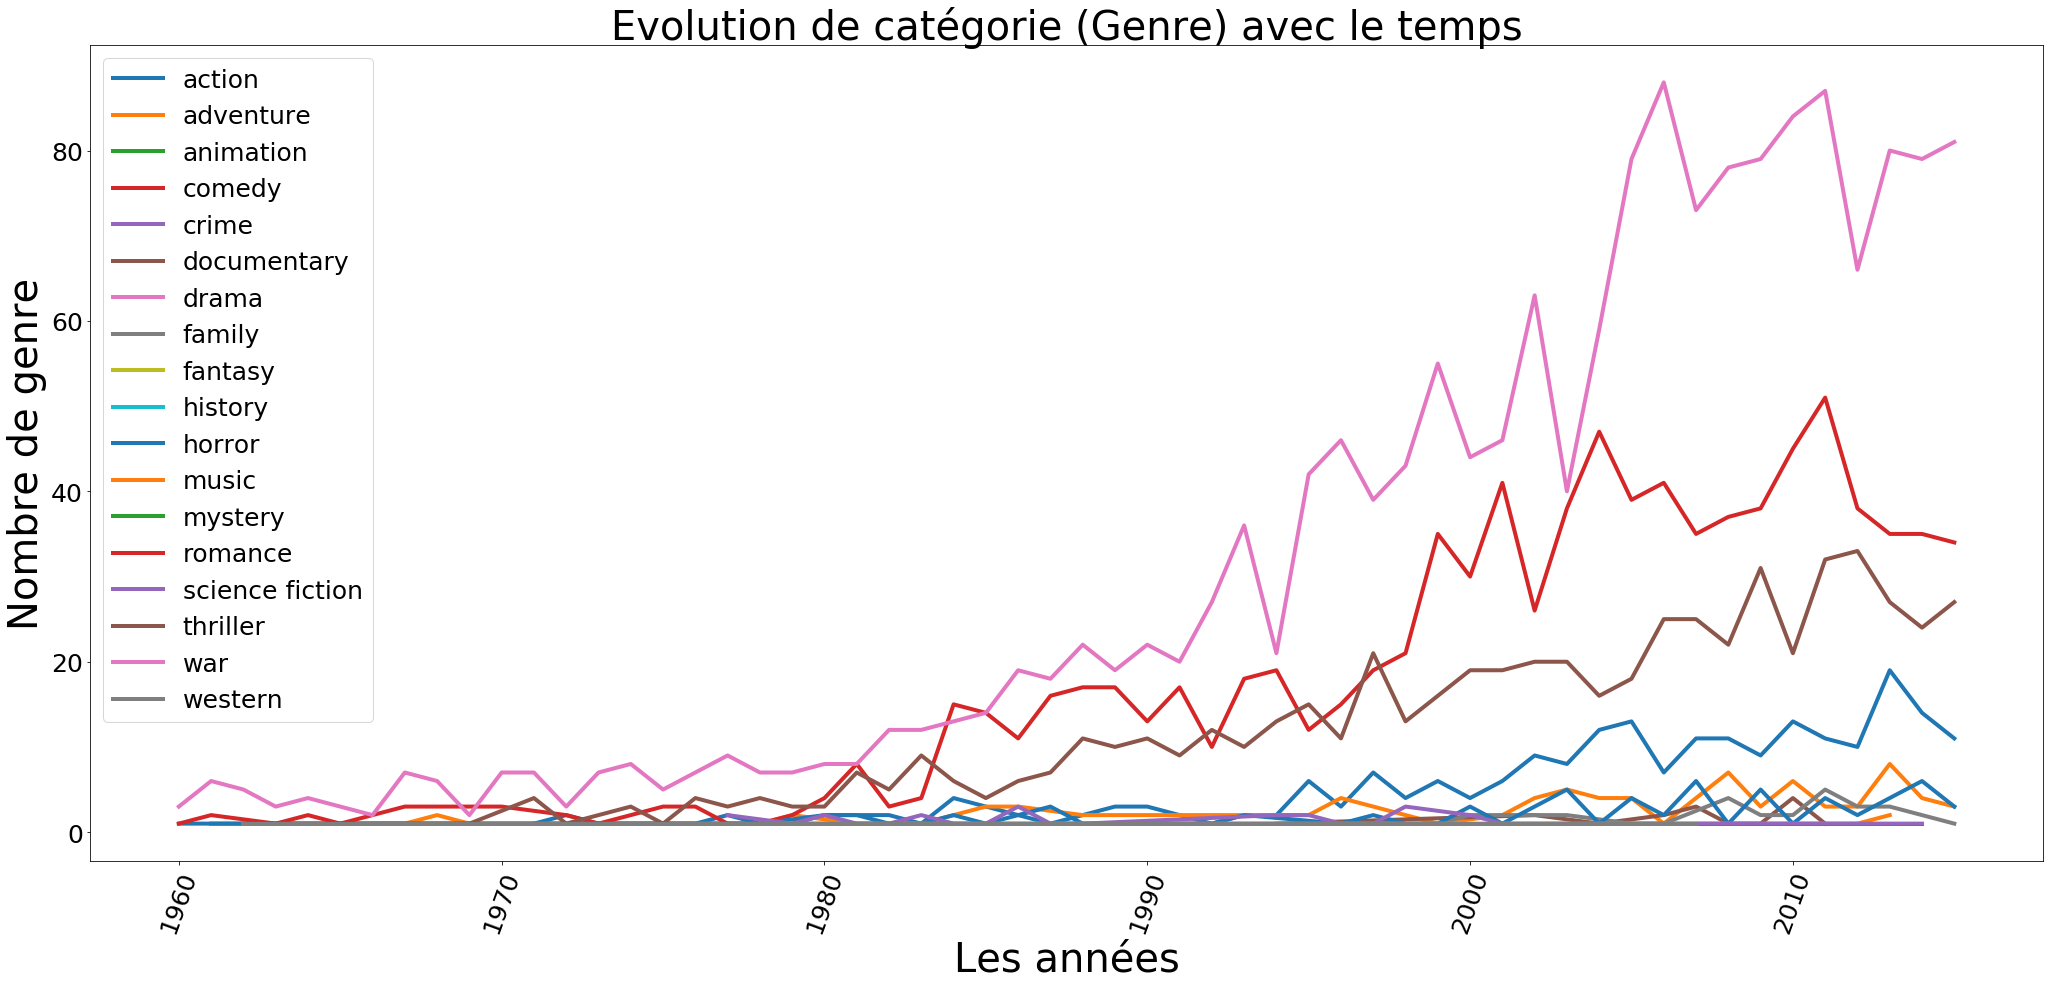

In [257]:
plt.figure(figsize=(35, 15))
for item in df_genres.genres_modified.unique():
    plt.plot(df_genres.query('genres_modified == @item')['release_year'], df_genres.query('genres_modified == @item')['count'], linewidth = 4, label = item);
    plt.xlabel('Les années', fontsize=40);
    plt.ylabel('Nombre de genre', fontsize=40)
    plt.title('Evolution de catégorie (Genre) avec le temps', fontsize=40)
plt.legend()
plt.xticks(rotation=70)
plt.show()

- on voit qu'il y a une très grande évolution dans les genres
- il y a une tres grande evolution dans les genres suivantes: Drama,comedy, documentary, ..

### Research Question 3 (Quels sont les genres les plus populaires selon la popularité du film ? )
- pour répondre à cette question on va regrouper par le nouveau genre crée après, on calcule la somme puis on affiche le résultat

In [258]:
# dans cette question on a utilise popularity du film pour trouve popularity de genre
df_genre_populaire = new_df.groupby('genres_modified')['popularity'].agg(['sum','count'])\
        .sort_values('sum', ascending=False).reset_index()
df_genre_populaire

,genres_modified,sum,count
0,drama,1752.635687,1730
1,comedy,1021.181615,926
2,thriller,901.093800,610
3,action,523.390265,239
4,adventure,189.761043,97
5,horror,61.474563,77
6,family,60.635320,35
7,science fiction,19.318552,33
8,romance,15.356331,11
9,documentary,6.542240,16


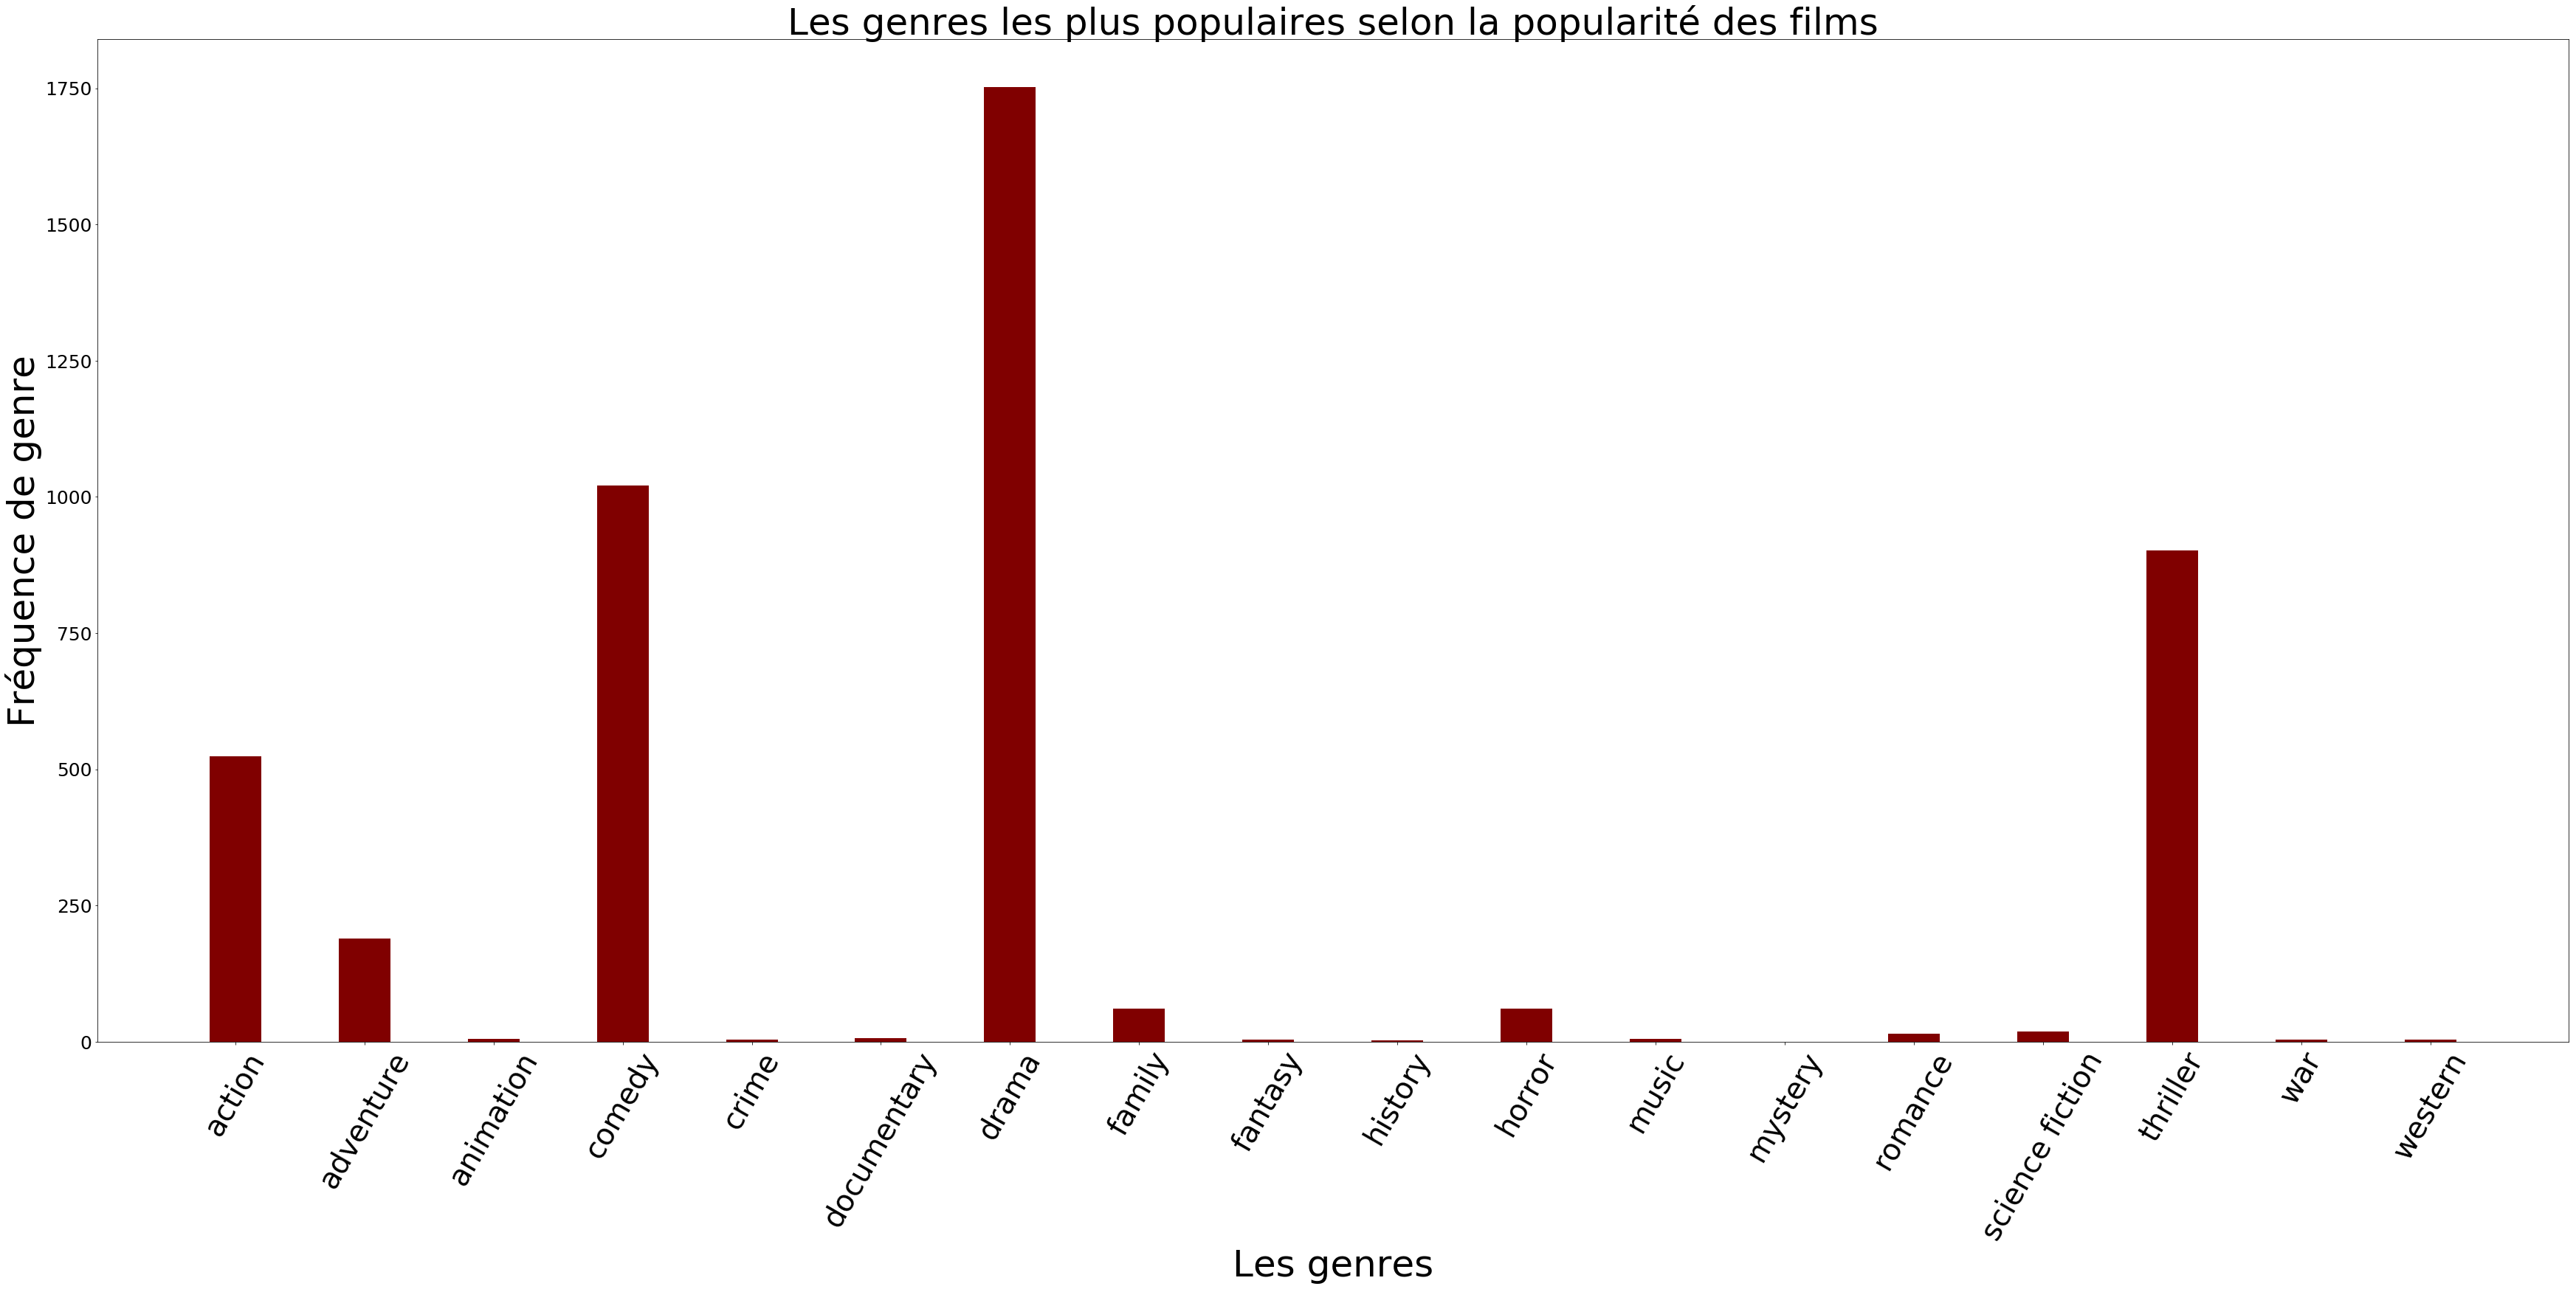

In [259]:
genres = list(df_genre_populaire.genres_modified)
values = list(df_genre_populaire['sum'].values)
  
fig = plt.figure(figsize = (60, 25))
plt.bar(genres, values, color ='maroon', width = 0.4)

plt.xlabel("Les genres", fontsize=50)
plt.ylabel("Fréquence de genre", fontsize=50)
plt.xticks(rotation=60, fontsize=40)
plt.title("Les genres les plus populaires selon la popularité des films", fontsize=50)
plt.show()

- il y a une grande dispersion entre les genres du film
- les genres les plus populaires sont: Drama, comedy, thrille

# les genres les plus populaires

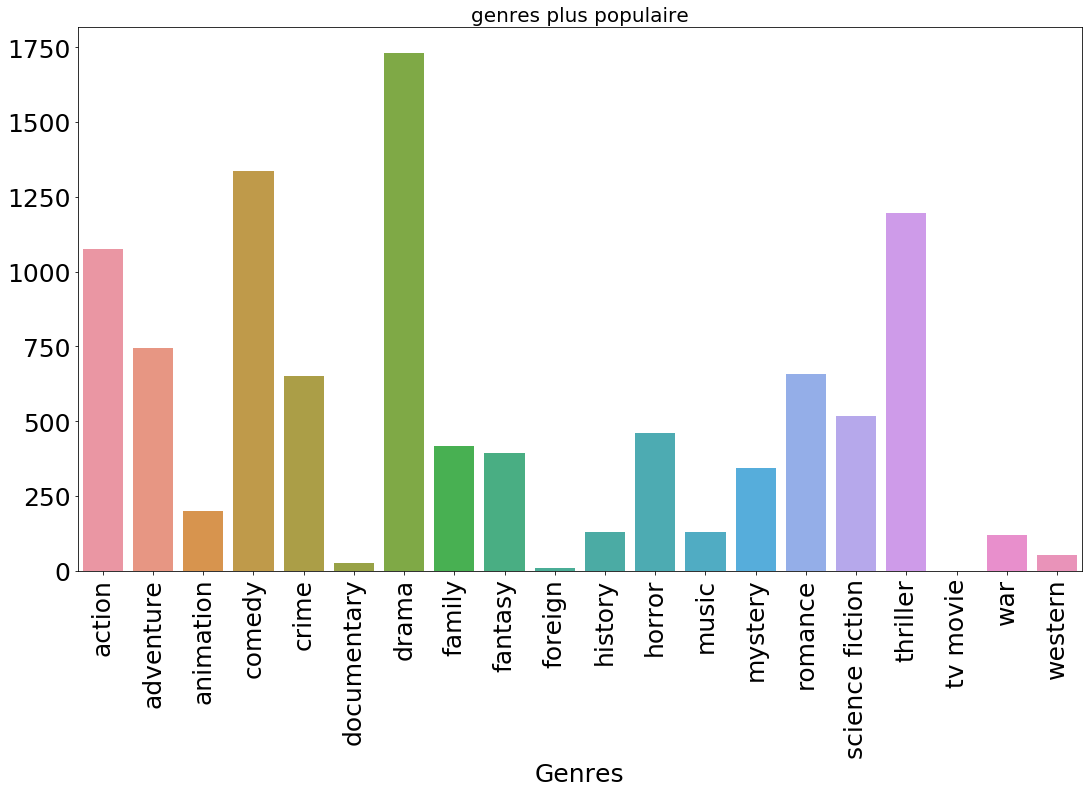

In [260]:
#Chercher d'abord les dummies à partir de "genres"
to_plot = new_df['genres'].str.get_dummies(sep=('|'))
to_be_plotted = to_plot.sum().reset_index()

plt.figure(figsize=(18, 10))
sns.barplot(x=to_plot.columns, y=to_plot.sum(), data=to_be_plotted)

#Configurer le titre et les libbelés
plt.title('genres plus populaire', fontsize=20)
plt.xlabel('Genres')
plt.xticks(rotation=90)
plt.show()


### Research Question 4  (Quelles sont les meilleurs directeur/directrice?)

- pour répondre à cette question on va filtrer notre jeu de donnes
- on va éliminer les films ayant une mauvaise note de vote_average
- on va éliminer les plus petits revenue_budget (revenu net)

In [261]:
new_df['revenue_budget'] = new_df.revenue - new_df.budget

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [262]:
new_df.vote_average.describe()

count    3806.000000
mean        6.170257
std         0.792560
min         2.200000
25%         5.700000
50%         6.200000
75%         6.700000
max         8.400000
Name: vote_average, dtype: float64

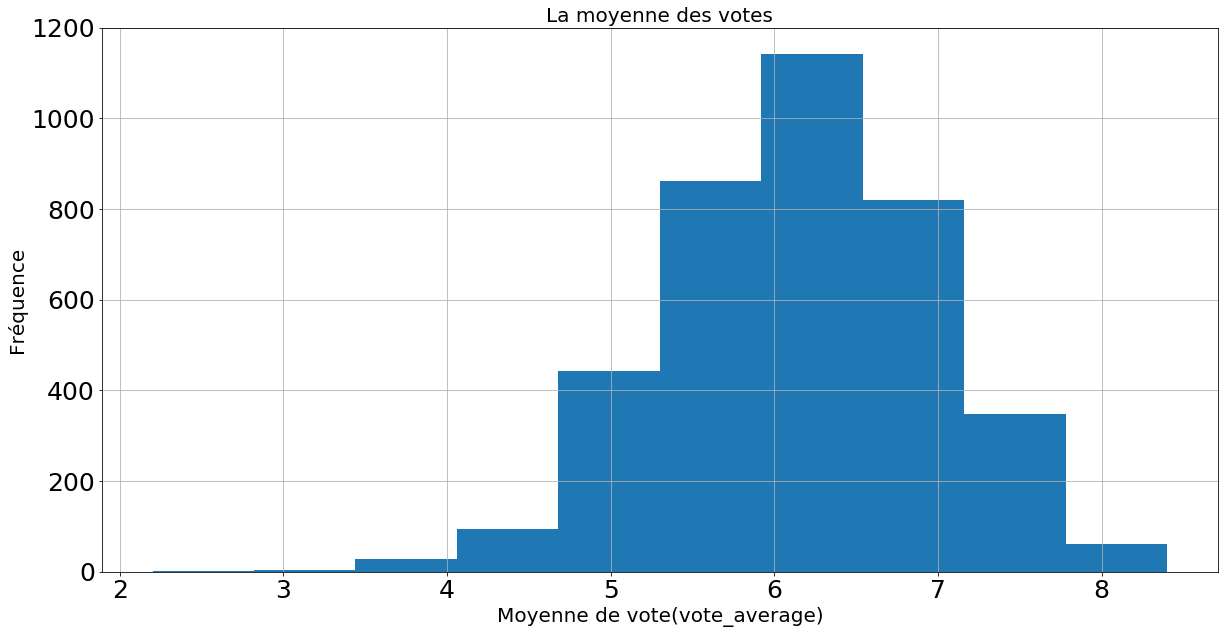

In [263]:
new_df.vote_average.hist(figsize=(20, 10));
plt.title('La moyenne des votes', fontsize=20);
plt.ylabel("Fréquence", fontsize=20)
plt.xlabel("Moyenne de vote(vote_average)", fontsize=20);

In [264]:
mean_vote_average = new_df.vote_average.mean()

In [265]:
new_df.revenue_budget.describe()

count    3.806000e+03
mean     7.133902e+07
std      1.513652e+08
min     -4.139124e+08
25%     -1.176610e+06
50%      2.047356e+07
75%      8.346731e+07
max      2.544506e+09
Name: revenue_budget, dtype: float64

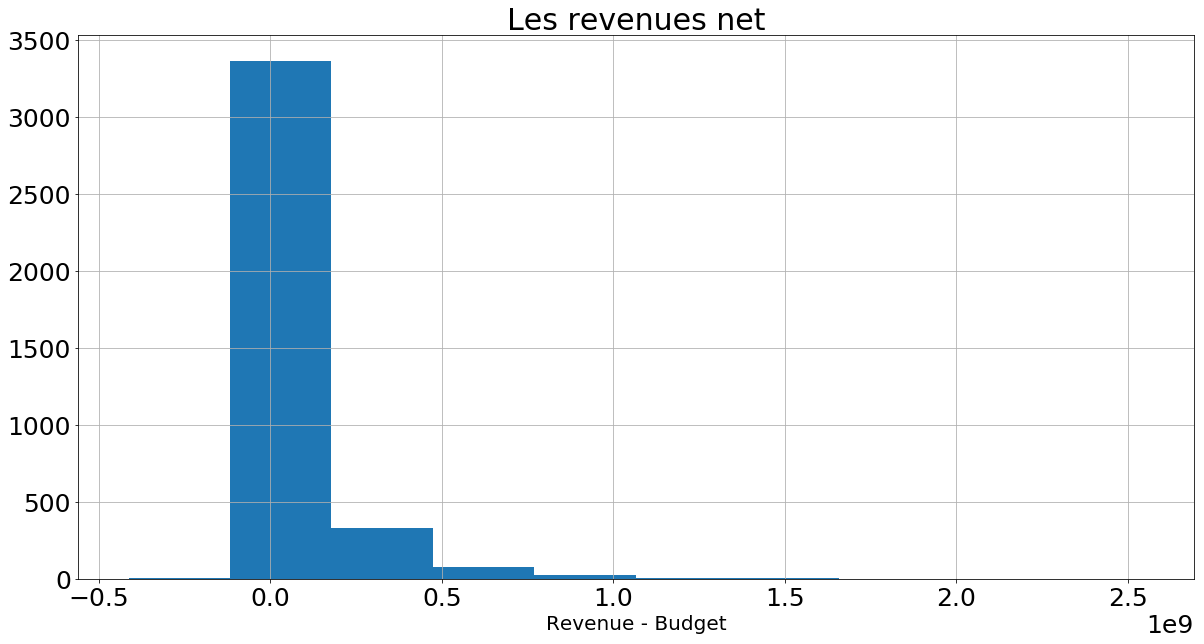

In [266]:
new_df.revenue_budget.hist(figsize=(20,10));
plt.title('Les revenues net');
plt.xlabel("Revenue - Budget", fontsize=20);

In [267]:
median_rev_bud = new_df.revenue_budget.median()

In [268]:
df_best_director = new_df.query('revenue_budget >= @median_rev_bud & vote_average >= @mean_vote_average')\
        .groupby('director')['revenue_budget'].agg(['sum','count'])\
        .sort_values('sum', ascending=False).reset_index().head(10)
df_best_director

,director,sum,count
0,steven spielberg,6199923304,21
1,peter jackson,5202593685,8
2,james cameron,5057953894,6
3,david yates,3379295625,4
4,christopher nolan,3162548502,8
5,george lucas,2954336893,5
6,chris columbus,2844126583,5
7,j.j. abrams,2839169916,5
8,robert zemeckis,2661775321,12
9,francis lawrence,2476979588,6


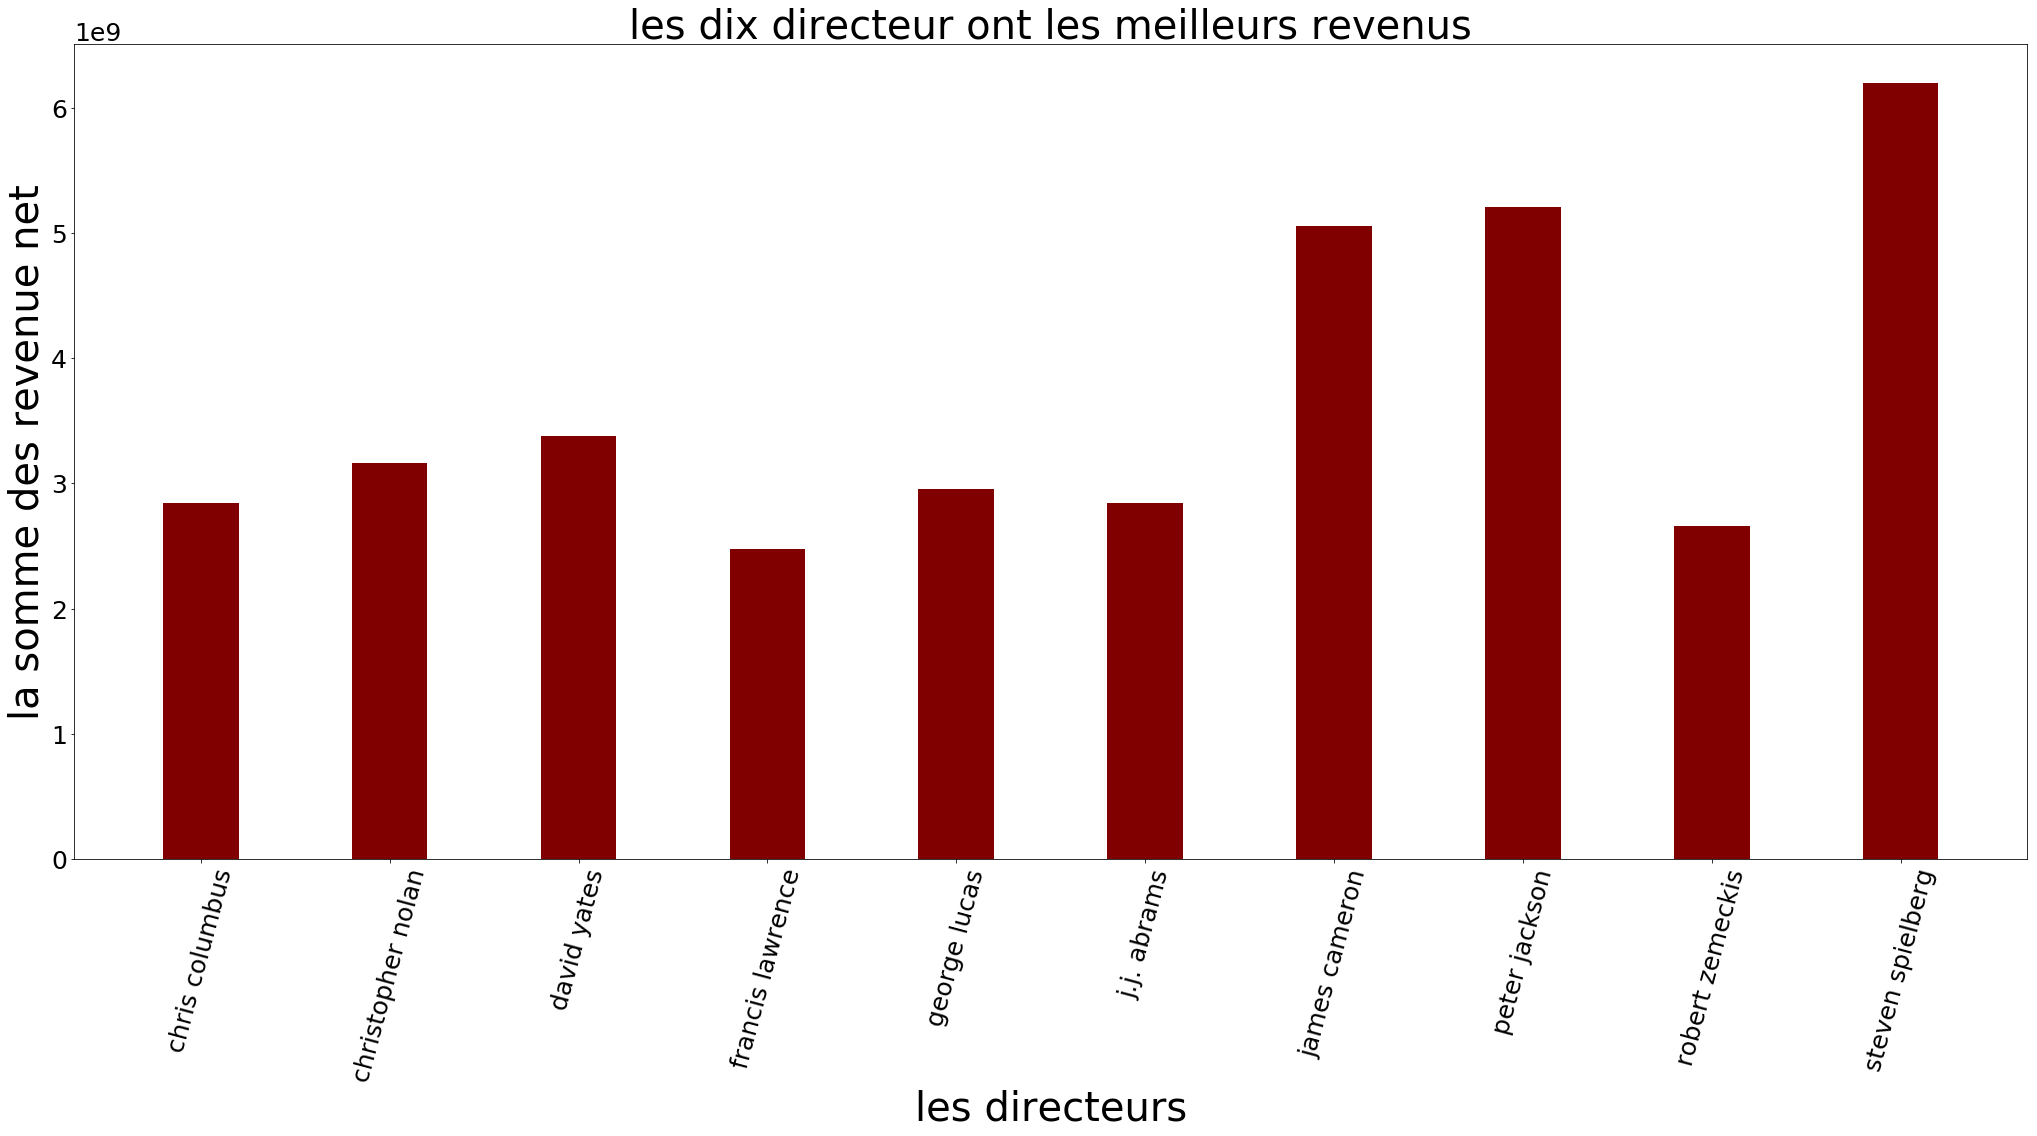

In [269]:
directors = list(df_best_director.director)
values = list(df_best_director['sum'].values)
  
fig = plt.figure(figsize = (35, 15))
plt.bar(directors, values, color ='maroon', width = 0.4)

plt.xlabel("les directeurs", fontsize=40)
plt.ylabel("la somme des revenue net", fontsize=40)
plt.xticks(rotation=75)
plt.title("les dix directeur ont les meilleurs revenus", fontsize=40)
plt.show()

- on n'a pas trouve une grande dispersion entre les revenues des directeurs

### Research Question 5  (Quels sont les films les plus populaires par genre?)
- on va regrouper par le nouveau genre <strong> genres_modified </strong> et le titre du film après on va calculer popularité de chaque groupe trouve, finalement on affichera le résultat 

In [270]:
df_pop_movies = new_df.groupby(['genres_modified', 'original_title'])['popularity'].agg('sum').reset_index()
df_pop_movies.query('genres_modified == "action"').sort_values('popularity', ascending=False).head(3)

,genres_modified,original_title,popularity
64,action,guardians of the galaxy,14.311205
30,action,captain america: the winter soldier,12.971027
149,action,star wars,12.037933


In [271]:
# on va afficher les films les plus populaire par genres
for genre in df_pop_movies.genres_modified.unique():
    df_popularity = df_pop_movies.query('genres_modified == @genre').sort_values('popularity', ascending=False).head(3)
    movie_popularity = [(name, popu) for name, popu in df_popularity[['original_title', 'popularity']].values]
    try:
        print(f'---------------------------------------------{genre}---------------------------------------------------------')
        for i in range(3):
            print(f'Pour le genre {genre}, le film {i} est : {movie_popularity[i][0]} avec une popularite {movie_popularity[i][1]}')
        print()
    except Exception as e:
        pass

---------------------------------------------action---------------------------------------------------------
Pour le genre action, le film 0 est : guardians of the galaxy avec une popularite 14.311205
Pour le genre action, le film 1 est : captain america: the winter soldier avec une popularite 12.971027000000001
Pour le genre action, le film 2 est : star wars avec une popularite 12.037933

---------------------------------------------adventure---------------------------------------------------------
Pour le genre adventure, le film 0 est : the hobbit: the battle of the five armies avec une popularite 10.174599
Pour le genre adventure, le film 1 est : harry potter and the philosopher's stone avec une popularite 8.021423
Pour le genre adventure, le film 2 est : frozen avec une popularite 6.112766000000001

---------------------------------------------animation---------------------------------------------------------
Pour le genre animation, le film 0 est : lilo & stitch avec une populari

### Research Question 6  (Quels sont les date de publication qui ayant une grande sortie de film? Y a-t-il les revenues les plus eleve dans ces années?)

In [272]:
df_release_year = new_df.groupby('release_year')['revenue'].agg(['sum', 'count']).reset_index()
df_release_year.head()

,release_year,sum,count
0,1960,129005000,5
1,1961,337720188,10
2,1962,206329846,7
3,1963,176526882,6
4,1964,328613548,7


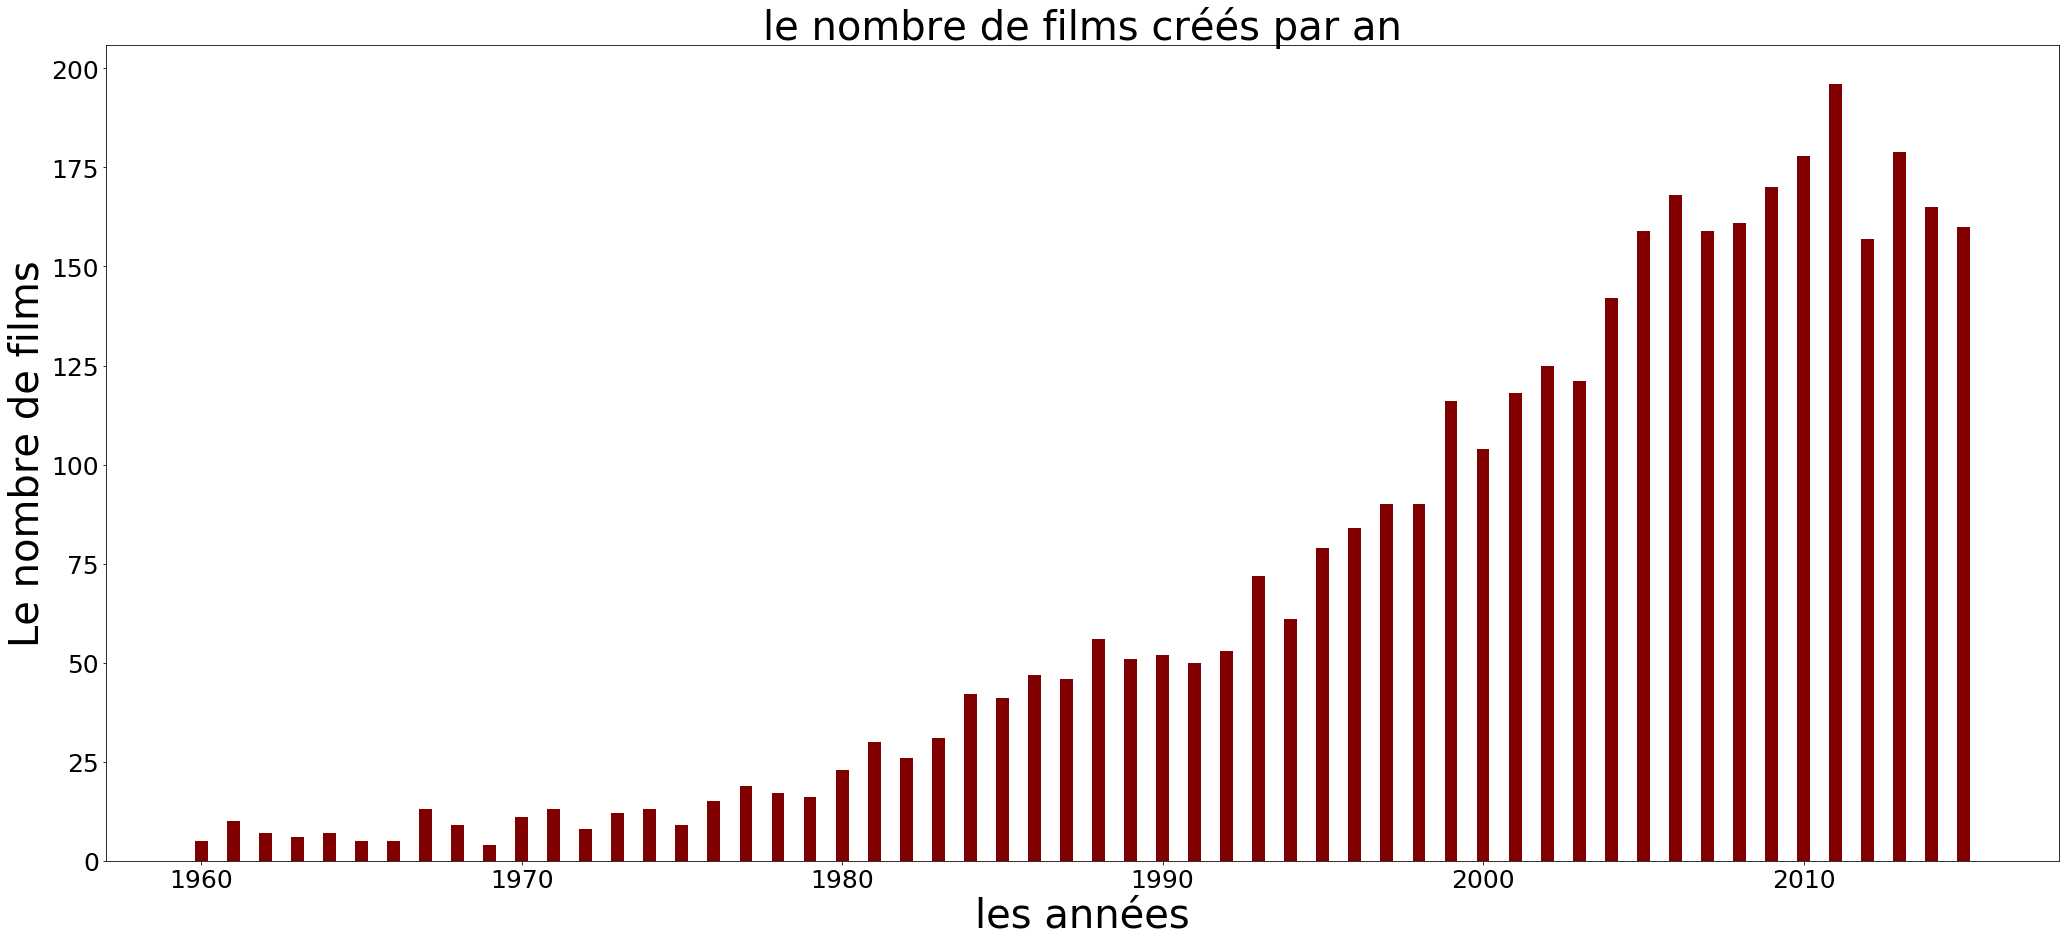

In [273]:
years = list(df_release_year.release_year)
values = list(df_release_year['count'].values)
  
fig = plt.figure(figsize = (35, 15))
plt.bar(years, values, color ='maroon', width = 0.4)

plt.xlabel("les années", fontsize=40)
plt.ylabel("Le nombre de films", fontsize=40)
plt.title("le nombre de films créés par an", fontsize=40)
plt.show()


- il y a une tres grande evolution dans la prduction de film par annee
- l'année 2011 est l'année qui ayant la valeur la plus élevée dans la production du film

#### Y a-t-il les revenues les plus eleve dans ces années?)

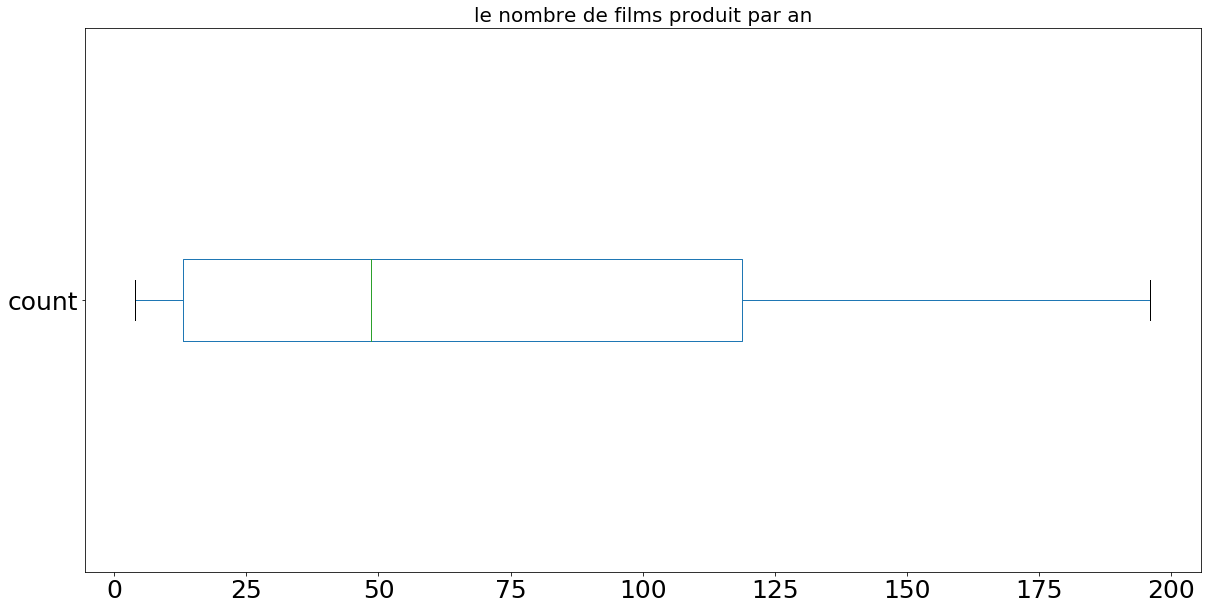

In [274]:
# box plot pour voir homogénéité de la colonne count(le nombre de films produits en un an )
df_release_year['count'].plot(kind='box', vert=False, figsize=(20, 10));
# on va utiliser la moyenne pour éliminer les années inférieures à la moyenne
mean_count_movie = df_release_year['count'].mean()
plt.title('le nombre de films produit par an', fontsize=20);

In [275]:
# on garder juste les donnees des annees qui ayant une grande valeur du count(le nombre de films produits en un an )
freq_year_puplication = df_release_year.query('count >= @mean_count_movie')
freq_year_puplication.head()

,release_year,sum,count
33,1993,6176513906,72
35,1995,8219440078,79
36,1996,7711688569,84
37,1997,10408527923,90
38,1998,9217901044,90


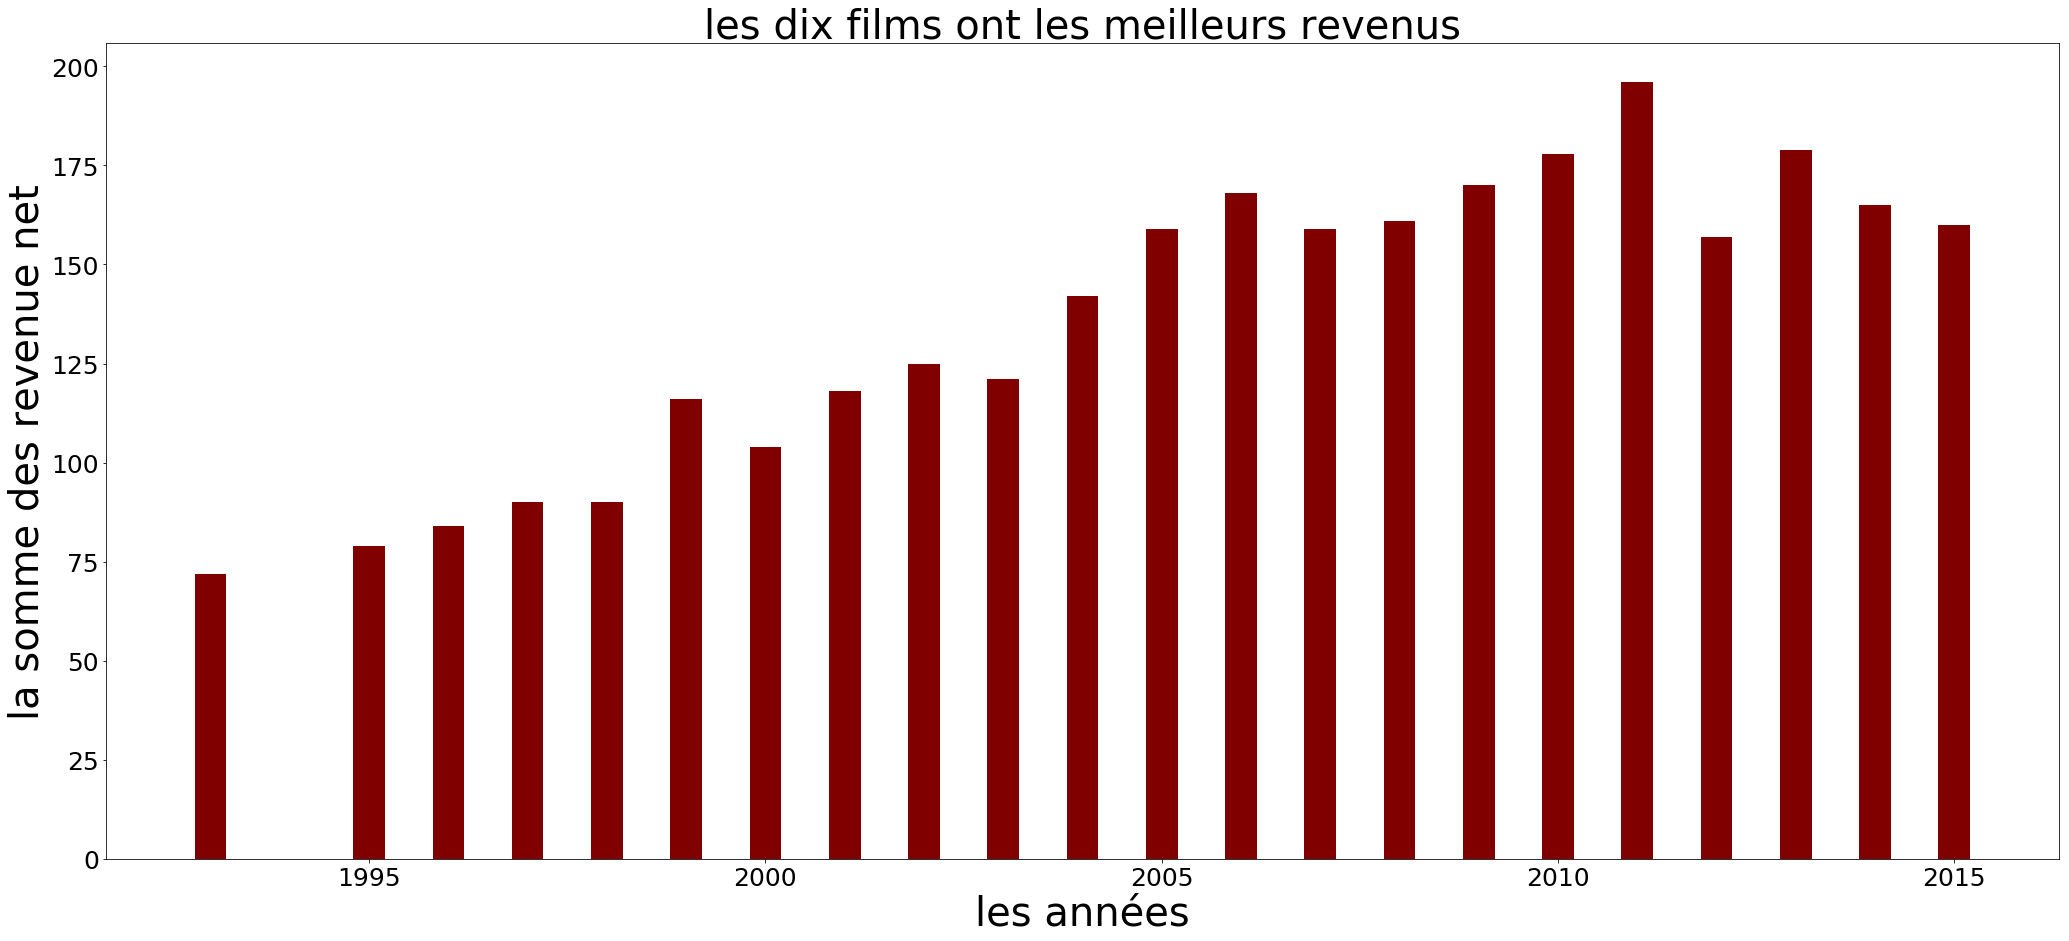

In [276]:
years = list(freq_year_puplication.release_year)
values = list(freq_year_puplication['count'].values)
  
fig = plt.figure(figsize = (35, 15))
plt.bar(years, values, color ='maroon', width = 0.4)

plt.xlabel("les années", fontsize=40)
plt.ylabel("la somme des revenue net",  fontsize=40)
plt.title("les dix films ont les meilleurs revenus",  fontsize=40)
plt.show()

- le revenue augmente rapidement année par année
- oui les années qui contiennent les plus nombres de la production de films aussi contiennent les plus grandes revenues dans ce jeu de données

### Research Question 8  (Y a-t-elle une évolution dans le revenue des film ?)

In [277]:
df_revuene_year = new_df.groupby('release_year')['revenue'].agg(['sum', 'count']).reset_index()
df_revuene_year.head()

,release_year,sum,count
0,1960,129005000,5
1,1961,337720188,10
2,1962,206329846,7
3,1963,176526882,6
4,1964,328613548,7


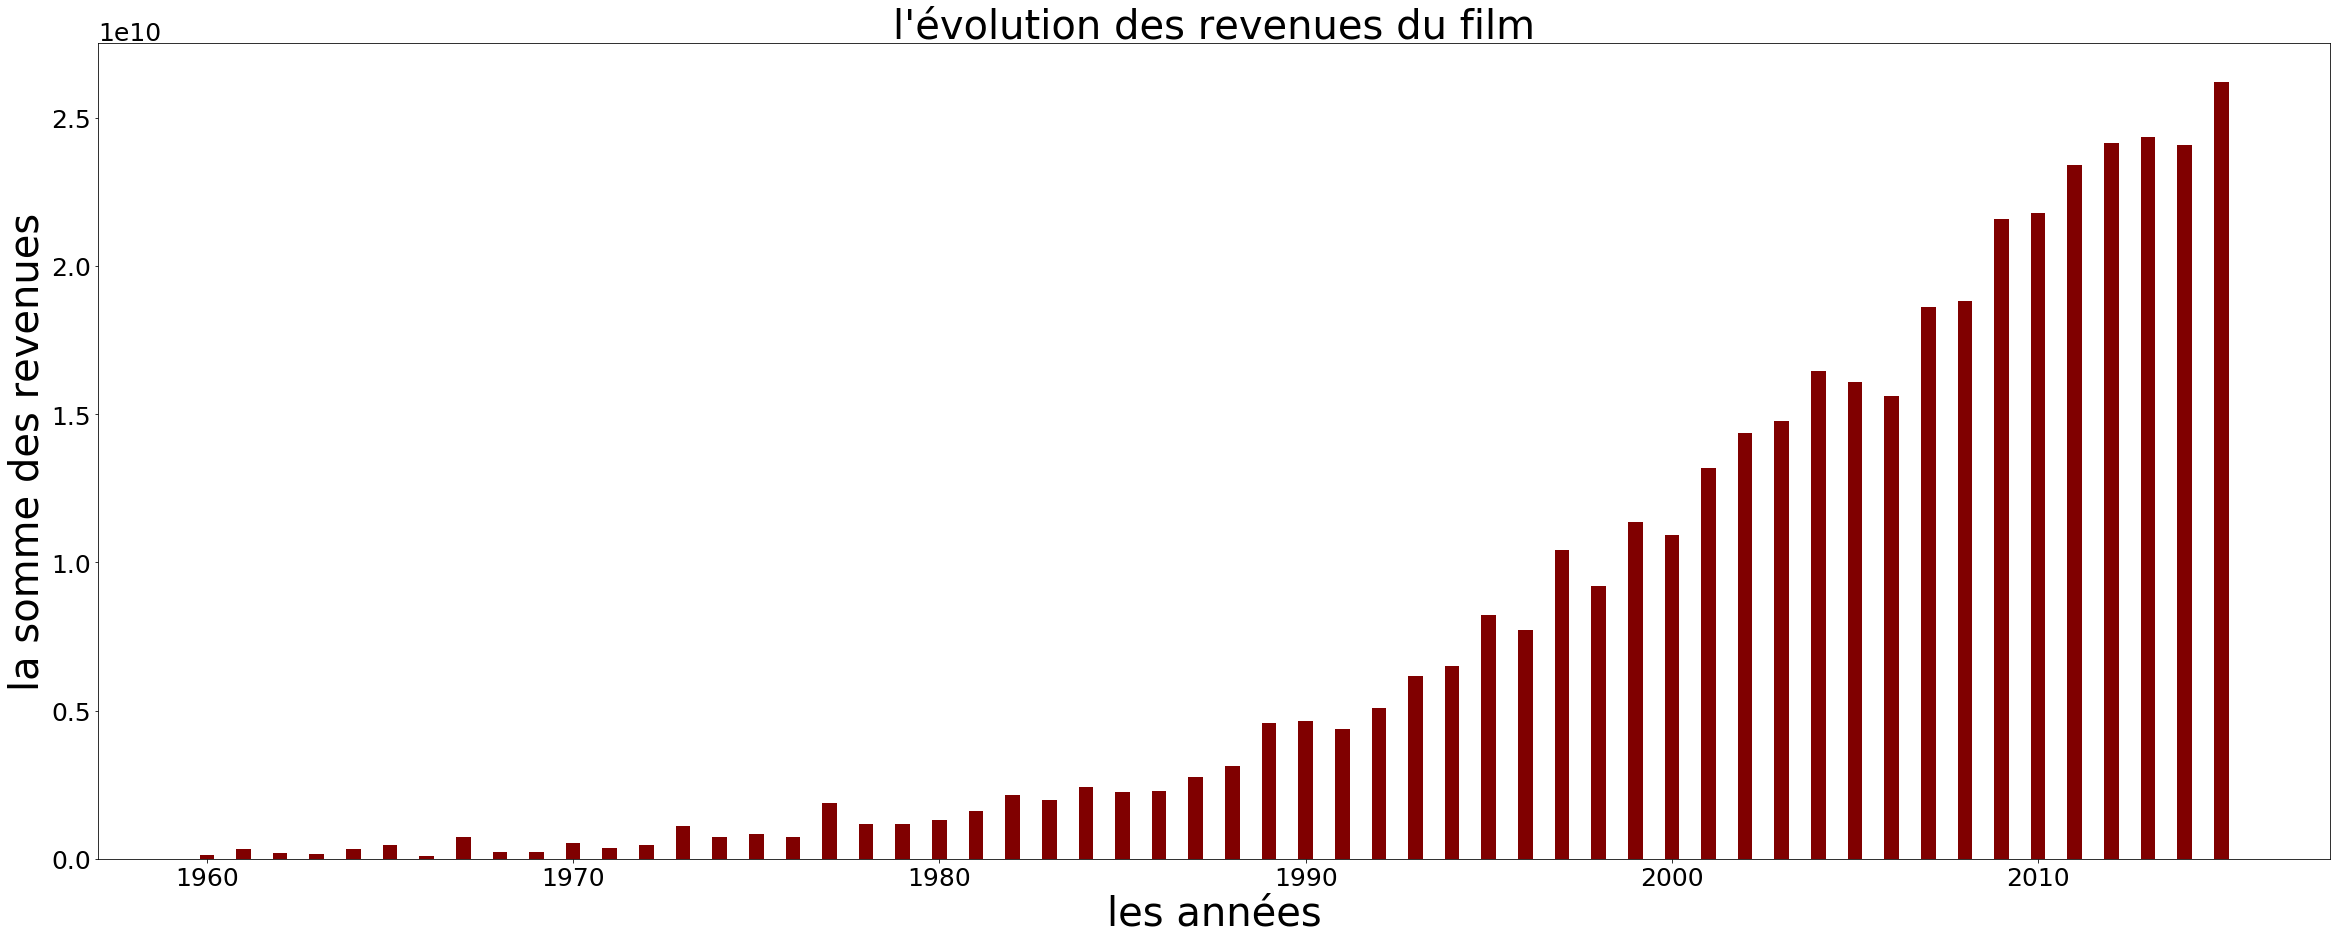

In [278]:
years = list(df_revuene_year.release_year)
values = list(df_revuene_year['sum'].values)
  
fig = plt.figure(figsize = (40, 15))
plt.bar(years, values, color ='maroon', width = 0.4)

plt.xlabel("les années", fontsize=40)
plt.ylabel("la somme des revenues", fontsize=40)
plt.title("l'évolution des revenues du film", fontsize=40)
plt.show()

- on remarque il y a une très grande évolution dans les revenus des films
- chaque année le revenue augmente rapidement

### Research Question 9  (Quelle  année a le revenu le plus élève?)

In [279]:
new_df.groupby('release_year')['revenue'].agg(['sum', 'count'])\
    .reset_index().sort_values('sum', ascending=False).head(1)


,release_year,sum,count
55,2015,26202922801,160


### Research Question 10  (Est-ce le film a le vote le plus élève, il a le revenue le plus élève?)

In [280]:
df_vote_revenue = new_df.groupby('original_title')['vote_count', 'revenue'].agg(['sum']).reset_index()
df_vote_revenue.columns = df_vote_revenue.columns.droplevel(1)
df_vote_revenue.rename(columns= {'vote_count': 'sum_vote_count', 'revenue': 'sum_revenue'}, inplace=True)
df_vote_revenue.head()

,original_title,sum_vote_count,sum_revenue
0,(500) days of summer,1778,60722734
1,10 things i hate about you,947,53478166
2,"10,000 bc",586,266000000
3,101 dalmatians,367,320689294
4,102 dalmatians,150,183611771


In [281]:
# le meilleur film a une grande vote
df_vote_revenue.query('sum_vote_count == sum_vote_count.max()')

,original_title,sum_vote_count,sum_revenue
1388,inception,9767,825500000


In [282]:
# le meilleur film a une grande revenue
df_vote_revenue.query('sum_revenue == sum_revenue.max()')

,original_title,sum_vote_count,sum_revenue
281,avatar,8458,2781505847


### Research Question 10  (Quelle sont les film ayant une gande revenue net?)

In [283]:
# on a utilise la colonne revenue_budget pour trouver  les films
new_df.sort_values('revenue_budget', ascending=False)\
    [['original_title' , 'budget', 'revenue','revenue_budget']].head(10)

,original_title,budget,revenue,revenue_budget
1386,avatar,237000000,2781505847,2544505847
3,star wars: the force awakens,200000000,2068178225,1868178225
5231,titanic,200000000,1845034188,1645034188
0,jurassic world,150000000,1513528810,1363528810
4,furious 7,190000000,1506249360,1316249360
4361,the avengers,220000000,1519557910,1299557910
3374,harry potter and the deathly hallows: part 2,125000000,1327817822,1202817822
14,avengers: age of ultron,280000000,1405035767,1125035767
5422,frozen,150000000,1274219009,1124219009
8094,the net,22000000,1106279658,1084279658


### Research Question 11  (Quelle sont les film ayant une grande inflation du budget?)

In [284]:
df_inflation_reve = new_df.groupby('original_title')['budget_adj', 'revenue_adj'].agg('sum')\
    .reset_index().sort_values('budget_adj', ascending=False).head(10)
df_inflation_reve

,original_title,budget_adj,revenue_adj
3390,the warrior's way,4.250000e+08,1.108757e+07
2091,pirates of the caribbean: on stranger tides,3.683713e+08,9.904175e+08
1541,king kong,3.230894e+08,8.157125e+08
1149,godzilla,3.212750e+08,9.943329e+08
2089,pirates of the caribbean: at world's end,3.155006e+08,1.010654e+09
2621,superman returns,2.920507e+08,4.230205e+08
2724,the avengers,2.892055e+08,1.508100e+09
2258,robin hood,2.736674e+08,4.681040e+08
3462,titanic,2.716921e+08,2.506406e+09
2519,spider-man 3,2.713305e+08,9.369017e+08


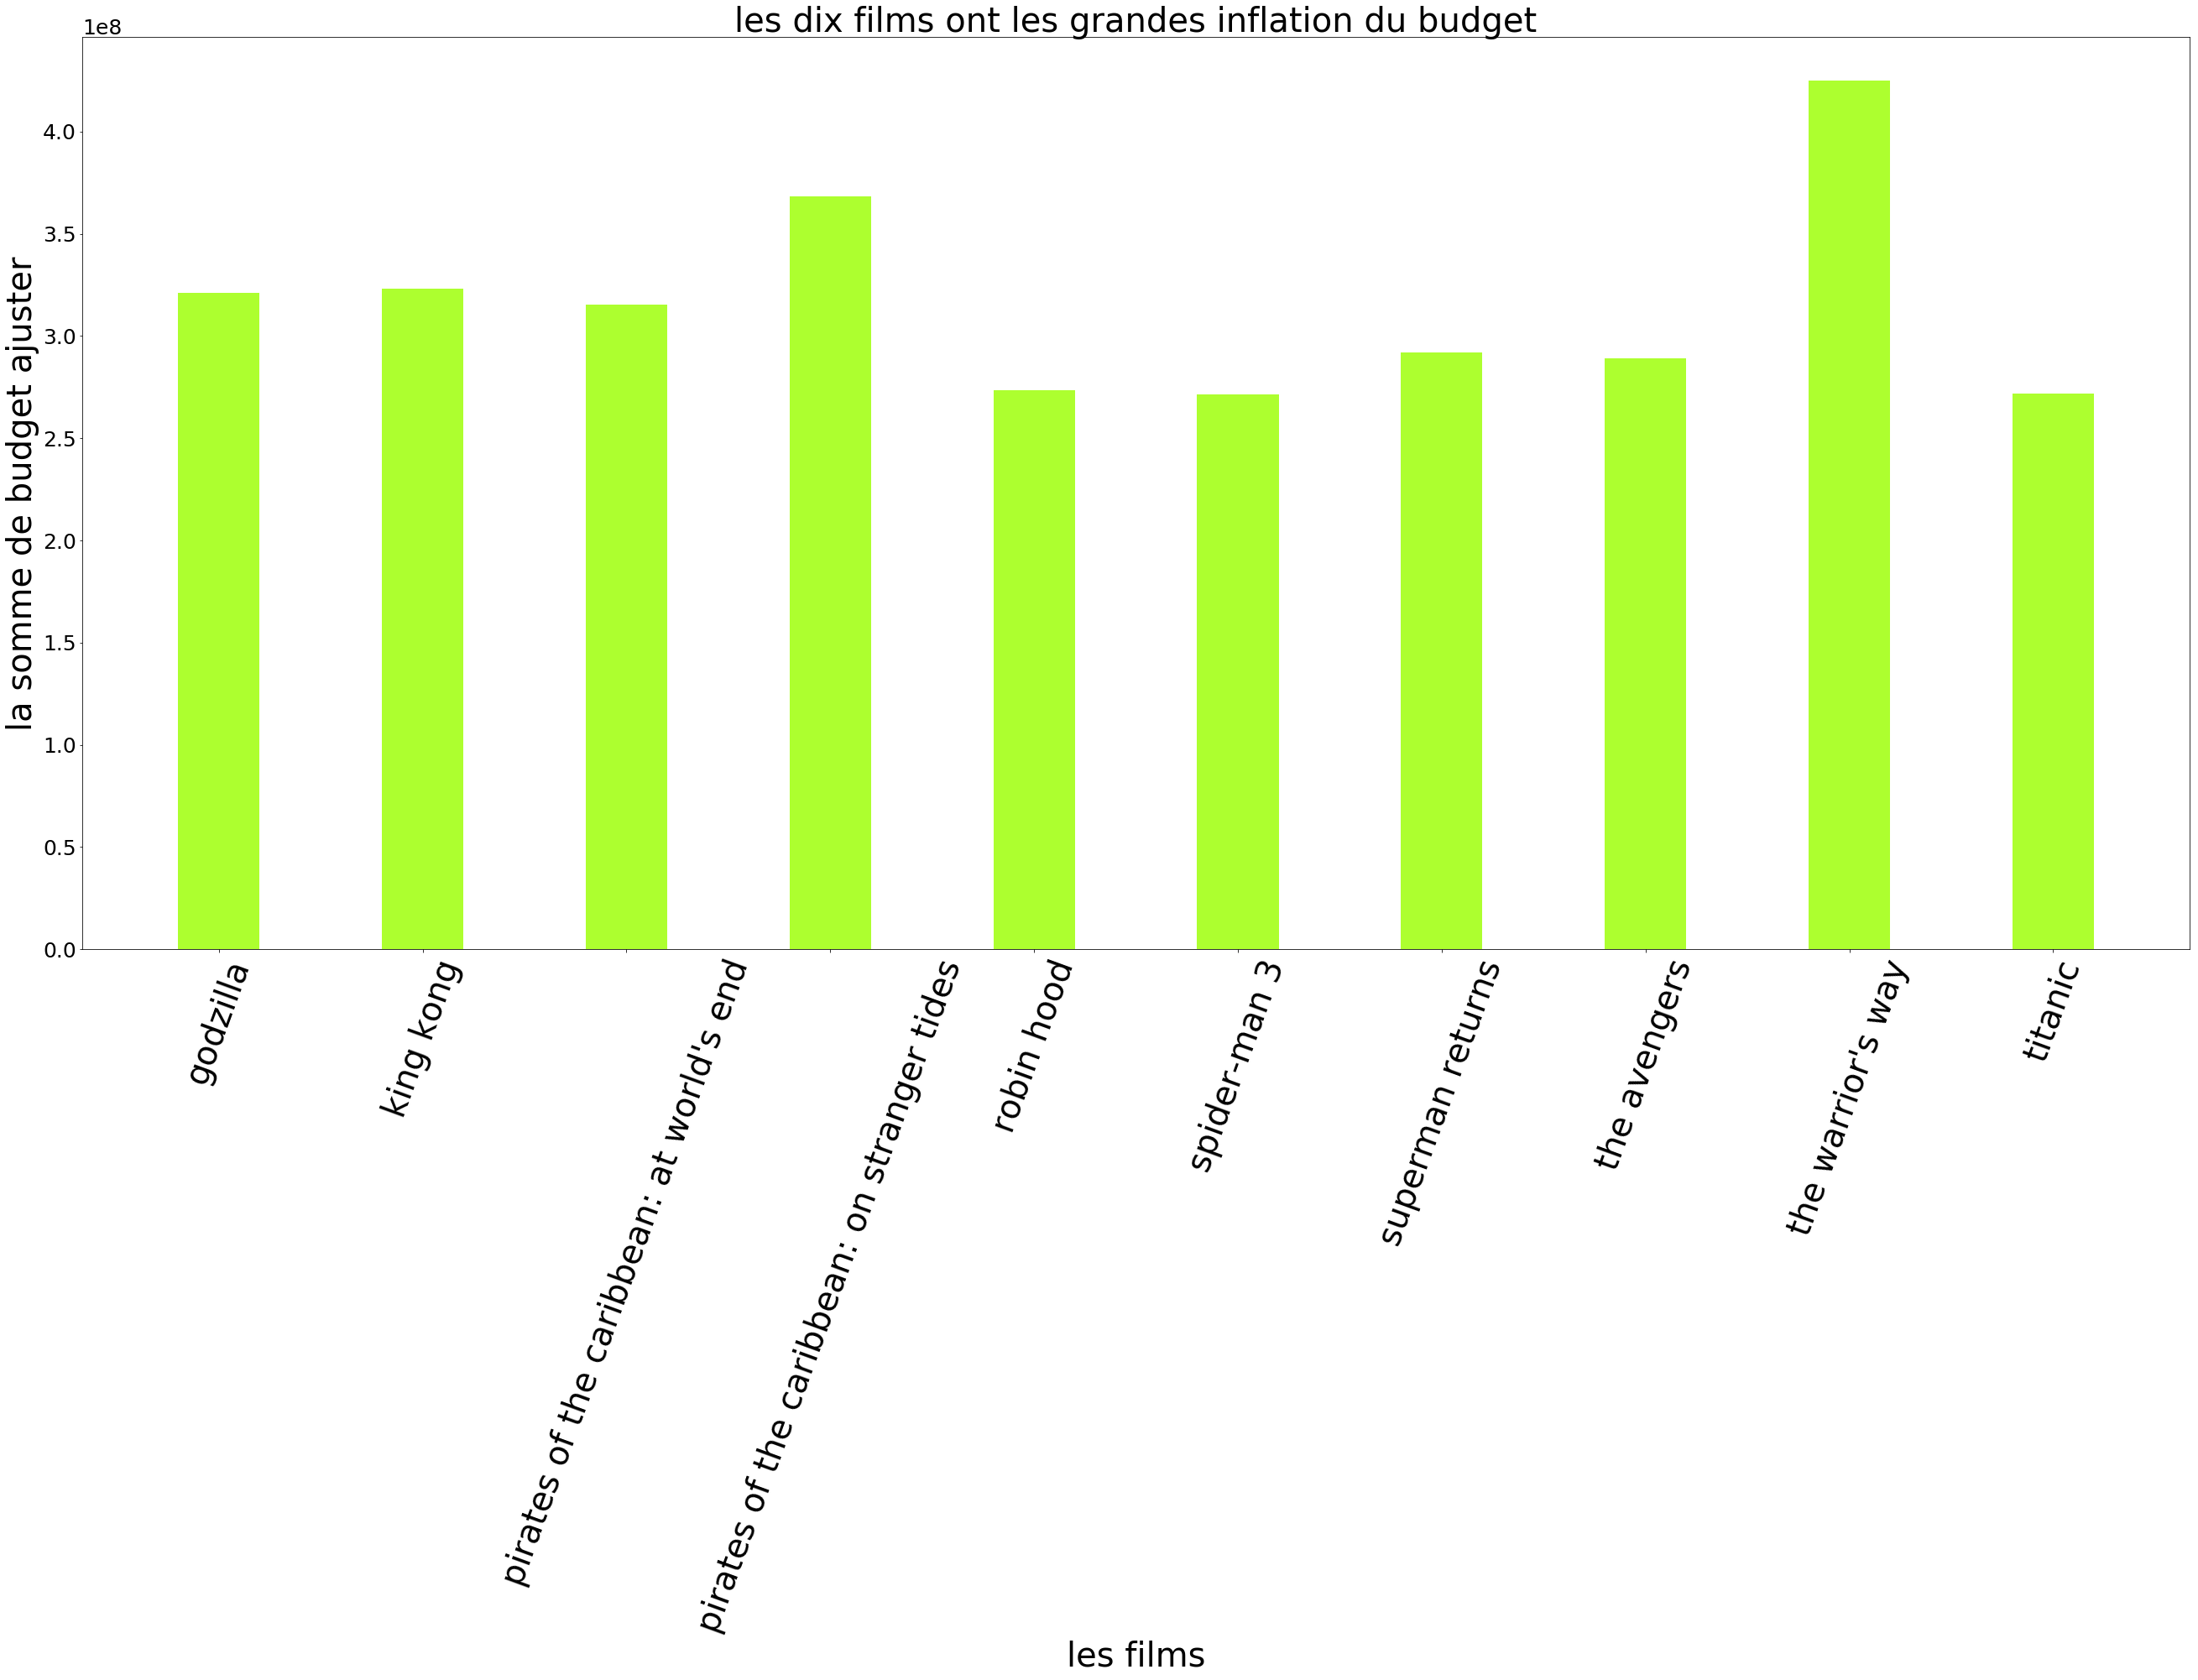

In [285]:
original_title = list(df_inflation_reve.original_title)
values = list(df_inflation_reve['budget_adj'].values)

fig = plt.figure(figsize = (45, 20))
plt.bar(original_title, values, color ='GreenYellow', width = 0.4)

plt.xlabel("les films", fontsize=40)
plt.ylabel("la somme de budget ajuster", fontsize=40)
plt.xticks(rotation=70. , fontsize=40)
plt.title("les dix films ont les grandes inflation du budget", fontsize=40)
plt.show()

- on n'a pas une dispersion entre les budget_adj des dix films

### Research Question 12  (Quelle sont les film ayant une grande inflation du revenue?)

In [286]:
# on va garder juste les 10 premieres ligne qui contiennent les puls grande valeurs du revenues
df_inflation_bud = new_df.groupby('original_title')['budget_adj', 'revenue_adj'].agg('sum')\
    .reset_index().sort_values('revenue_adj', ascending=False).head(10)
df_inflation_bud

,original_title,budget_adj,revenue_adj
281,avatar,2.408869e+08,2.827124e+09
2545,star wars,3.957559e+07,2.789712e+09
3462,titanic,2.716921e+08,2.506406e+09
2877,the exorcist,3.928928e+07,2.167325e+09
1451,jaws,2.836275e+07,1.907006e+09
2550,star wars: the force awakens,1.839999e+08,1.902723e+09
881,e.t. the extra-terrestrial,2.372625e+07,1.791694e+09
3165,the net,3.148127e+07,1.583050e+09
1991,one hundred and one dalmatians,2.917944e+07,1.574815e+09
2724,the avengers,2.892055e+08,1.508100e+09


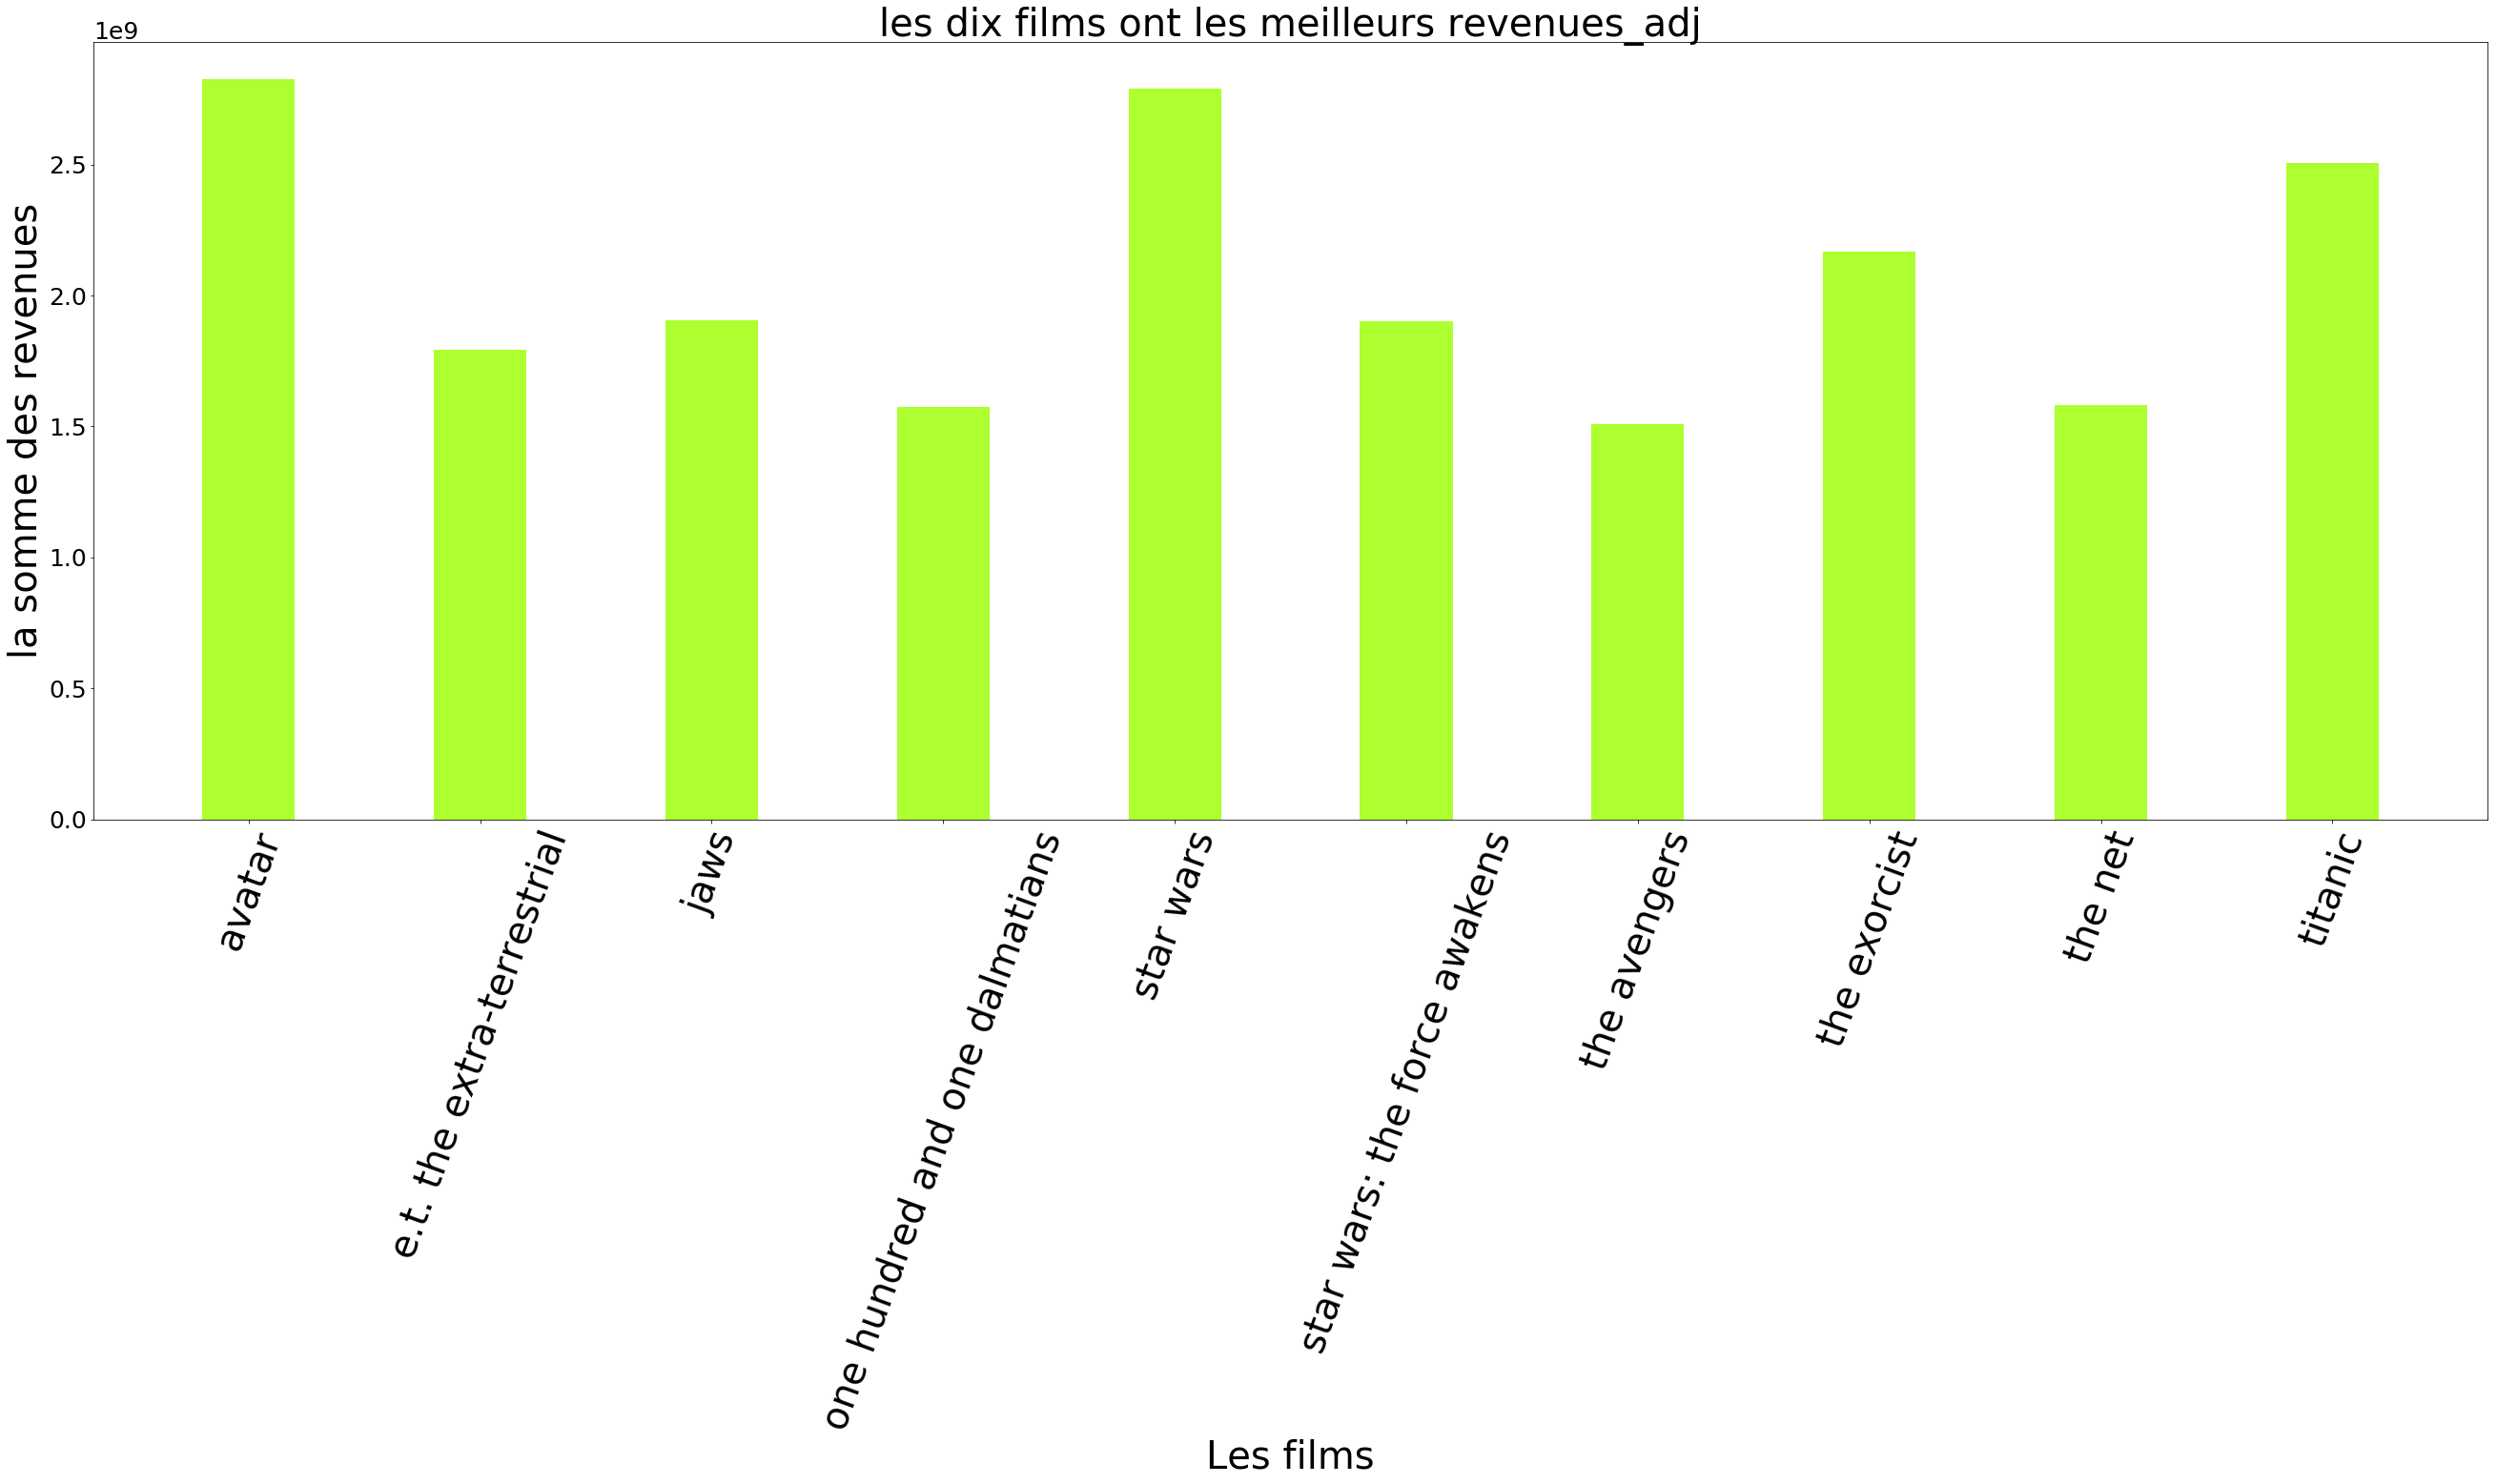

In [287]:
original_title = list(df_inflation_bud.original_title)
values = list(df_inflation_bud['revenue_adj'].values)
  
fig = plt.figure(figsize = (45, 15))
plt.bar(original_title, values, color ='GreenYellow', width = 0.4)

plt.xlabel("Les films", fontsize=40)
plt.xticks(rotation=70, fontsize=40)
plt.ylabel("la somme des revenues", fontsize=40)
plt.title("les dix films ont les meilleurs revenues_adj", fontsize=40)
plt.show()

### Research Question 13  (Quelle sont les films ayant une grande inflation du revenue et le petit inflation du budget?)

In [288]:
# on va faire une selection pour selectionner les films 
df_com = df_inflation_bud.merge(df_inflation_reve, on="original_title")
df_com

,original_title,budget_adj_x,revenue_adj_x,budget_adj_y,revenue_adj_y
0,titanic,2.716921e+08,2.506406e+09,2.716921e+08,2.506406e+09
1,the avengers,2.892055e+08,1.508100e+09,2.892055e+08,1.508100e+09


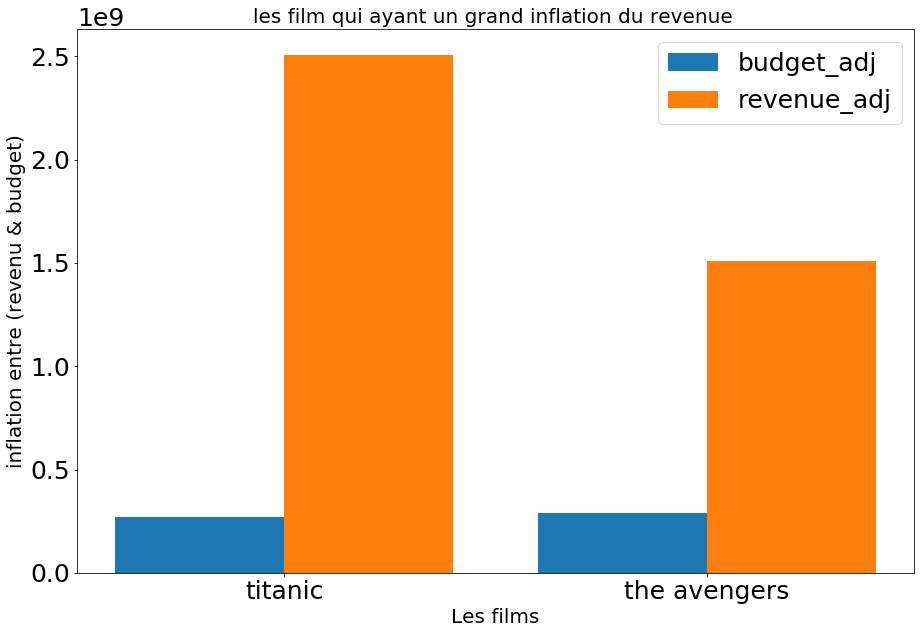

In [289]:
original_title = list(df_com.original_title)
values = list(df_com['budget_adj_x'].values)
X_axis = np.arange(len(original_title))
fig = plt.figure(figsize = (15, 10))

plt.bar(X_axis - 0.2, values, 0.4,  label = 'budget_adj')

values = list(df_com['revenue_adj_x'].values)

plt.bar(X_axis + 0.2, values,0.4, label = 'revenue_adj')

plt.xticks(X_axis, original_title)
plt.xlabel("Les films", fontsize=20)
plt.ylabel("inflation entre (revenu & budget)", fontsize=20)
plt.title("les film qui ayant un grand inflation du revenue ", fontsize=20)
plt.legend()
plt.show()

- on remaque que il y a une inflation entre le revenue_adj et le budget_adj
- en plus les revenue_adj sont tres grandes que les budget_adj

### Research Question 14  (Quelles sont les entreprises du production qui s'ameliorent par le temps?)

In [290]:
# on regroup par entreprise et l'annee du sortie, apres on va eleminer toutes les entreprise qui sont inferieure a 2000
df_compamies = new_df.groupby(['pro_companie_modified', 'release_year'])['revenue_budget']\
                    .agg('sum').reset_index().query('release_year > 2000')
# on calcule le frequance de chaque entreprise dans la novelle dataframe
counts = df_compamies['pro_companie_modified'].value_counts()
# on va éliminer les production_companies les moins fréquents de 15
df_compamies = df_compamies[df_compamies['pro_companie_modified'].isin(counts[counts >= 15].index)]
df_compamies.head()

,pro_companie_modified,release_year,revenue_budget
254,columbia pictures,2001,-18016290
255,columbia pictures,2002,1361441595
256,columbia pictures,2003,270443696
257,columbia pictures,2004,224047199
258,columbia pictures,2005,79917128


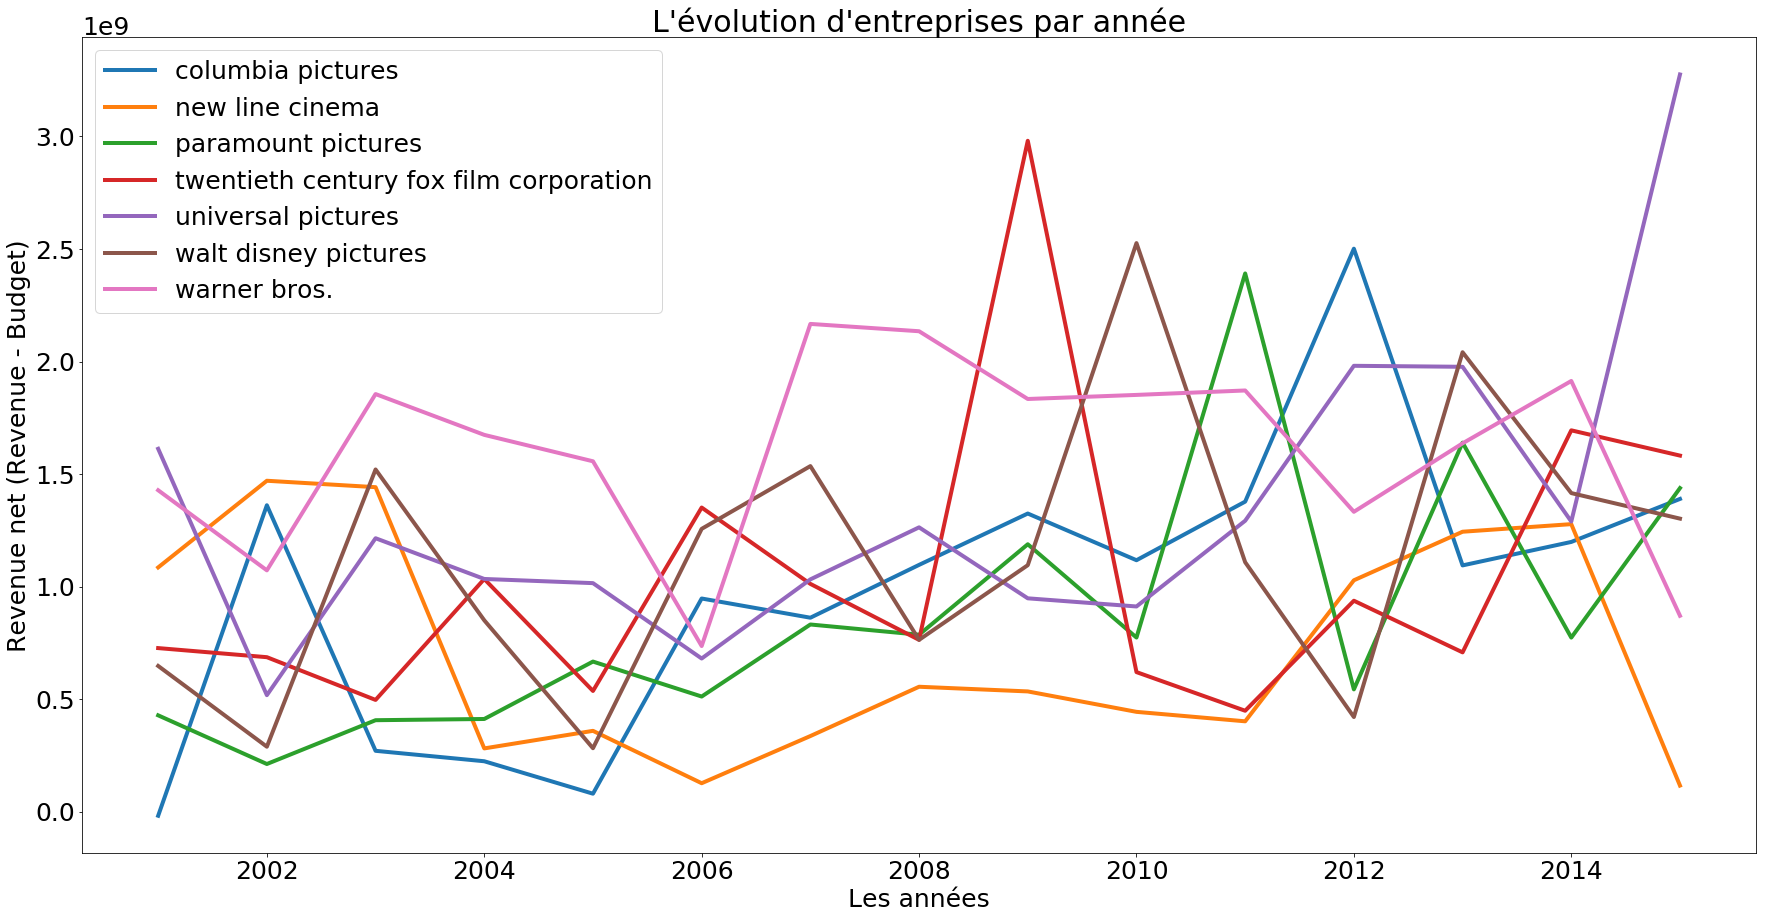

In [291]:
plt.figure(figsize=(30, 15))
for item in df_compamies.pro_companie_modified.unique():
    plt.plot(df_compamies.query('pro_companie_modified == @item')['release_year'], df_compamies.query('pro_companie_modified == @item')['revenue_budget'],linewidth = 4, label = item);
    plt.xlabel('Les années');
    plt.ylabel('Revenue net (Revenue - Budget)')
    plt.title('L\'évolution d\'entreprises par année')
plt.legend()
plt.show()

- entre 2000 et 2015 il y a une concurrance entre les entreprise du production
- l'evolution dans cette periode(2000 - 2015) il y a une evolution dans les entreprise mais n'est pas grande

<a id='conclusions'></a>
## Conclusions

<h6>Après exploration, nous avons vu dans cet ensemble de données plusieurs points,  </h6>  

- il y a une grande évolution dans la production des films.     

- Ces dernières années, les budgets des meilleurs films sont souvent très élevés. 

- la majorité des meilleurs films ont des budgets très importants      

- il y a aussi une évolution des genres de films, nous avons vu que les gens aiment beaucoup les genres suivants : drame, action, comédie, aventure, horreur, science-fiction...     

- Les recettes des films augmentent également rapidement.

- Cela est dû à plusieurs points : il y a de nouvelles sociétés, le nombre de films produits par an augmente également, il y a aussi plus d'acteurs. 

- Les meilleurs films ont de meilleures augmentations de revenus comme Titanic, les Avengers, etc.  

- les meilleurs films ont toujours le plus grand nombre de votes et le plus grand budget.

- les entresprise qui apparaissent dans les dernineres annees, qui s'ameliorent par le temps 

- pour les films qui ayant un grande revenue, toujous ils ont des revenues ajuster tres grande

- l'evolution du film apparaît entre 2000 et 2015, dans cette periode on a vu une grande evolution dans (les revenues, budget, companies, le nombre de film
  produit par annee, ....)

# Limitations

- le jeu de données contient des valeurs manquantes et valeurs aberrantes
- le nombre des features est petit
- si on a d'autres features comme: le nombre de vues du film, le nombre d'heures les personnes regarder le film,
- on a des features dans le jeu de données qui ne contient pas de l'information
- on a besoin plus de détails sur les films
- on a besoin les statistiques de films après l'année 2015

<p>
J'ai garde les valeurs aberrantes et j'ai supprimé les valeurs manquantes donc j'ai ajouté des hypothèses à ce jeu de donnée cela influence les analyses que j'ai réalisé.
</p>


In [292]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0